### **Importing_Libraries**

In [2]:
import os
import sys
import math
import scipy as scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
pd.set_option('display.max_columns',30)
label_font_dict = {'family':'sans-serif','size':13.5,'color':'brown','style':'italic'}
title_font_dict = {'family':'sans-serif','size':16.5,'color':'Blue','style':'italic'}

#  EDA

In [4]:
train_bene_df = pd.read_csv("../input/healthcare-provider-fraud-detection-analysis/Train_Beneficiarydata-1542865627584.csv")
train_ip_df = pd.read_csv("../input/healthcare-provider-fraud-detection-analysis/Train_Inpatientdata-1542865627584.csv")
train_op_df = pd.read_csv("../input/healthcare-provider-fraud-detection-analysis/Train_Outpatientdata-1542865627584.csv")

In [5]:
train_bene_df.shape

(138556, 25)

In [6]:
train_bene_df.columns

Index(['BeneID', 'DOB', 'DOD', 'Gender', 'Race', 'RenalDiseaseIndicator',
       'State', 'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt'],
      dtype='object')

In [7]:
train_bene_df.dtypes

BeneID                             object
DOB                                object
DOD                                object
Gender                              int64
Race                                int64
RenalDiseaseIndicator              object
State                               int64
County                              int64
NoOfMonths_PartACov                 int64
NoOfMonths_PartBCov                 int64
ChronicCond_Alzheimer               int64
ChronicCond_Heartfailure            int64
ChronicCond_KidneyDisease           int64
ChronicCond_Cancer                  int64
ChronicCond_ObstrPulmonary          int64
ChronicCond_Depression              int64
ChronicCond_Diabetes                int64
ChronicCond_IschemicHeart           int64
ChronicCond_Osteoporasis            int64
ChronicCond_rheumatoidarthritis     int64
ChronicCond_stroke                  int64
IPAnnualReimbursementAmt            int64
IPAnnualDeductibleAmt               int64
OPAnnualReimbursementAmt          

In [8]:
train_bene_df.head()

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,2,2,2,2,2,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,1,2,2,2,2,2,2,1,2,2,2,0,0,90,40
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,1,1,2,2,2,2,1,1,1,1,2,0,0,1810,760
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,2,2,2,2,1,2,1,2,2,2,2,0,0,1790,1200


In [9]:
train_bene_df['BeneID'].nunique()

138556

In [10]:
train_bene_df['Gender'].unique()

array([1, 2])

In [11]:
train_bene_df['Gender'] = train_bene_df['Gender'].apply(lambda val: 0 if val == 2 else 1)

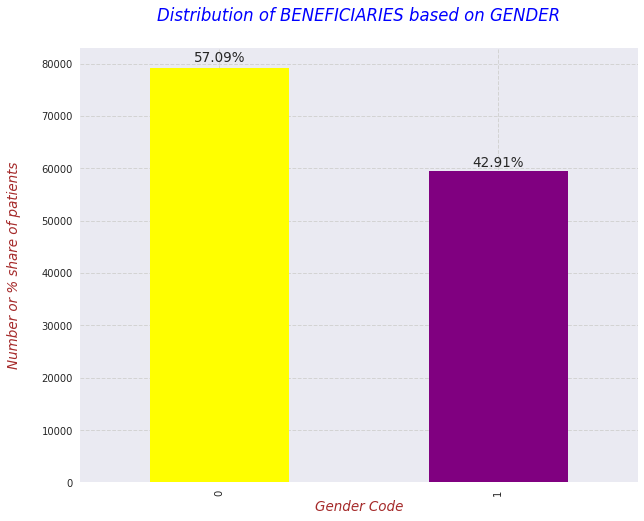

In [12]:
with plt.style.context('seaborn'):
  plt.figure(figsize=(10,8))
  fig = train_bene_df['Gender'].value_counts().plot(kind='bar', color=['yellow','purple'])
  # Using the "patches" function we will get the location of the rectangle bars from the graph.
  ## Then by using those location(width & height) values we will add the annotations
  for p in fig.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    fig.annotate(f'{str(round((height*100)/train_bene_df.shape[0],2))+"%"}', (x + width/2, y + height*1.015), ha='center', fontsize=13.5)
  # Providing the labels and title to the graph
  plt.xlabel("Gender Code", fontdict=label_font_dict)
  plt.ylabel("Number or % share of patients\n", fontdict=label_font_dict)
  plt.grid(which='major', linestyle="--", color='lightgrey')
  plt.minorticks_on()
  plt.title("Distribution of BENEFICIARIES based on GENDER\n", fontdict=title_font_dict)

In [13]:
train_bene_df['DOB'] = pd.to_datetime(train_bene_df['DOB'], format="%Y-%m-%d")

In [14]:
train_bene_df['Patient_Age_Year'] = train_bene_df['DOB'].dt.year
train_bene_df['Patient_Age_Month'] = train_bene_df['DOB'].dt.month

* `YEAR of birth of beneficiaries`

In [15]:
bene_age_year_df = pd.DataFrame(train_bene_df['Patient_Age_Year'].value_counts()).reset_index(drop=False)
bene_age_year_df.columns= ['year','num_of_beneficiaries']
bene_age_year_df = bene_age_year_df.sort_values(by='year')

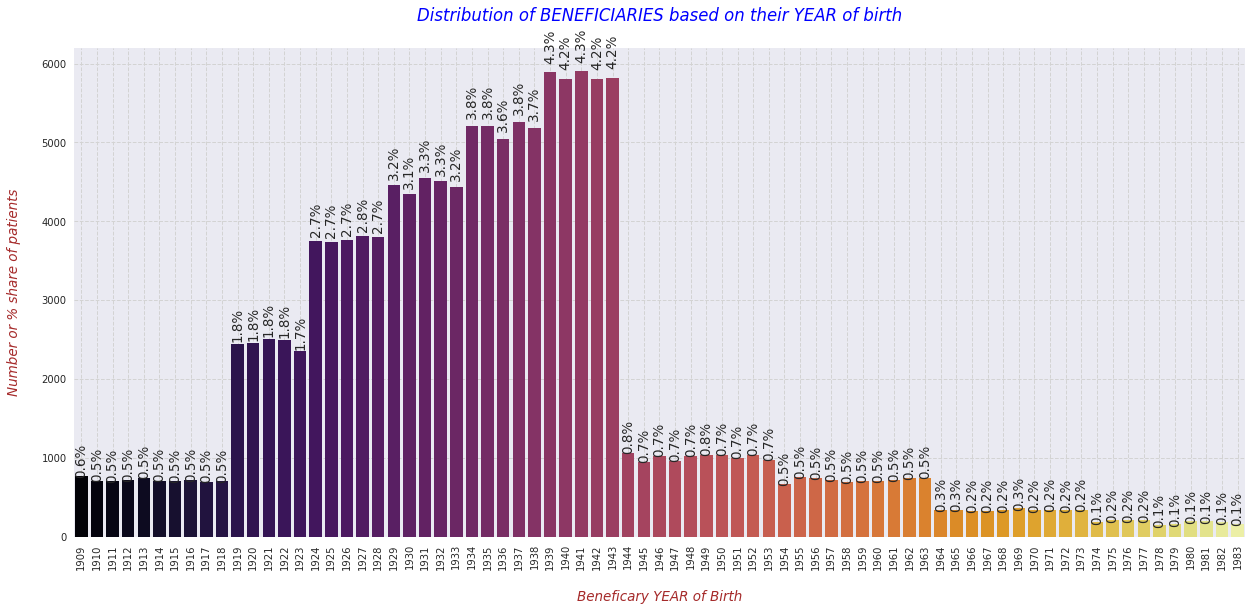

In [16]:
with plt.style.context('seaborn'):
  plt.figure(figsize=(21,9))
  fig = sns.barplot(data=bene_age_year_df, x='year', y='num_of_beneficiaries', palette='inferno')
  # Using the "patches" function we will get the location of the rectangle bars from the graph.
  ## Then by using those location(width & height) values we will add the annotations
  for p in fig.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    fig.annotate(f'{str(round((height*100)/train_bene_df.shape[0],1))+"%"}', (x + width/2, y + height*1.025), ha='center', fontsize=13.5, rotation=90)
  # Providing the labels and title to the graph
  plt.xlabel("\nBeneficary YEAR of Birth", fontdict=label_font_dict)
  plt.xticks(rotation=90)
  plt.ylabel("Number or % share of patients\n", fontdict=label_font_dict)
  plt.minorticks_on()
  plt.grid(which='major', linestyle="--", color='lightgrey')
  plt.title("Distribution of BENEFICIARIES based on their YEAR of birth\n", fontdict=title_font_dict)

**`OBERVATION`**
*   From the above plot, we can decude that the majority of the beneficiaries are from the YEAR - 1919 to 1943.
  *   More specifically, overall the percentage of number of beneficiaries with YEAR of birth from 1939 to 1943 is the highest. Whereas, it is lowest from 1978 to 1983.

**`REASONING`**
*   The reason for adding the "YEAR of Birth of Beneficiaries" as a new feature in the dataset with the intent to find whether personal details has been forged by the beneficiary or its direct/indirect association with Fraud claims.

In [17]:
bene_age_month_df = pd.DataFrame(train_bene_df['Patient_Age_Month'].value_counts()).reset_index(drop=False)
bene_age_month_df.columns= ['month','num_of_beneficiaries']
bene_age_month_df = bene_age_month_df.sort_values(by='month')

**`OBERVATION`**
* From the above plot, we can decude that there is no such difference b/w the patients based on their MONTH of birth. 
  * Initial, look suggests me that this feature might not be more of a use.


**`REASONING`**
* The reason for adding the "MONTH of Birth of Beneficiaries" as a new feature in the dataset with the intent to find whether personal details has been forged by the beneficiary or its direct/indirect association with Fraud claims.

In [19]:
train_bene_df.head()

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Patient_Age_Year,Patient_Age_Month
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70,1943,1
1,BENE11002,1936-09-01,NaN,0,1,0,39,280,12,12,2,2,2,2,2,2,2,2,2,2,2,0,0,30,50,1936,9
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,1,2,2,2,2,2,2,1,2,2,2,0,0,90,40,1936,8
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,1,1,2,2,2,2,1,1,1,1,2,0,0,1810,760,1922,7
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,2,2,2,2,1,2,1,2,2,2,2,0,0,1790,1200,1935,9


* `Beneficiary Dead or Alive?`

In [20]:
# 0 means ALIVE and 1 means DEAD
train_bene_df['Dead_or_Alive'] = train_bene_df['DOD'].apply(lambda val: 0 if val != val else 1)

In [21]:
train_bene_df['Dead_or_Alive'].value_counts()

0    137135
1      1421
Name: Dead_or_Alive, dtype: int64

- **`OBSERVATION`**
  - The above graph tells us that almost 99% of the beneficiaries are ALIVE and very small percentage of patients are DEAD. It would be good to see how much this feature has impact on the actual label.

In [23]:
train_bene_df['DOD'] = pd.to_datetime(train_bene_df['DOD'])

In [24]:
# Greatest Date of Death in the TRAIN set for beneficiaries
max_bene_DOD = max(train_bene_df['DOD'].unique()[1:])
max_bene_DOD

numpy.datetime64('2009-12-01T00:00:00.000000000')

In [25]:
# For all NAN DODs filling the greatest Date of Death
train_bene_df['DOD'].fillna(value=max_bene_DOD, inplace=True)

* `Beneficiary AGE`



In [26]:
train_bene_df['AGE'] = np.round(((train_bene_df['DOD'] - train_bene_df['DOB']).dt.days)/365.0,1)

In [27]:
train_bene_df.drop(labels=['DOD'],axis=1,inplace=True)

In [28]:
train_bene_df.head()

,BeneID,DOB,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Patient_Age_Year,Patient_Age_Month,Dead_or_Alive,AGE
0,BENE11001,1943-01-01,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70,1943,1,0,67.0
1,BENE11002,1936-09-01,0,1,0,39,280,12,12,2,2,2,2,2,2,2,2,2,2,2,0,0,30,50,1936,9,0,73.3
2,BENE11003,1936-08-01,1,1,0,52,590,12,12,1,2,2,2,2,2,2,1,2,2,2,0,0,90,40,1936,8,0,73.4
3,BENE11004,1922-07-01,1,1,0,39,270,12,12,1,1,2,2,2,2,1,1,1,1,2,0,0,1810,760,1922,7,0,87.5
4,BENE11005,1935-09-01,1,1,0,24,680,12,12,2,2,2,2,1,2,1,2,2,2,2,0,0,1790,1200,1935,9,0,74.3


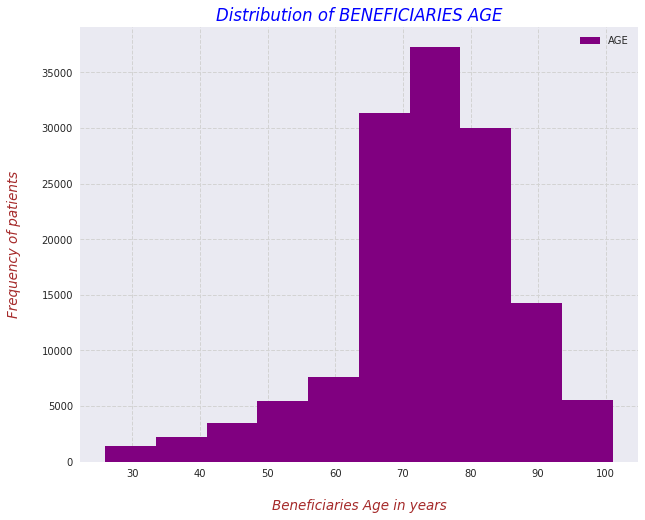

In [29]:
# Here, I'm displaying the distribution of AGE of Beneficiaries?
with plt.style.context('seaborn'):
  plt.figure(figsize=(10,8))
  train_bene_df['AGE'].plot(kind='hist', color='purple')
  # Providing the labels and title to the graph
  plt.xlabel("\nBeneficiaries Age in years", fontdict=label_font_dict)
  plt.ylabel("Frequency of patients\n", fontdict=label_font_dict)
  plt.grid(which='major', linestyle="--", color='lightgrey')
  plt.minorticks_on()
  plt.title("Distribution of BENEFICIARIES AGE", fontdict=title_font_dict)
  plt.legend();

- **`OBSERVATION`**
  - The above graph tells us that the majority of the beneficiaries are b/w 65 to 85 years.

In [30]:
train_bene_df['AGE'].describe()

count    138556.000000
mean         73.632756
std          12.736605
min          26.000000
25%          68.000000
50%          74.300000
75%          82.000000
max         101.000000
Name: AGE, dtype: float64

* `Beneficiary AGE brackets`


In [31]:
def bene_age_brackets(val):
  if val >=1 and val <=40:
    return 'Young'
  elif val > 40 and val <=60:
    return 'Mid'
  elif val > 60 and val <= 80:
    return 'Old'
  else:
    return 'Very Old'

In [32]:
train_bene_df['AGE_groups'] = train_bene_df['AGE'].apply(lambda age: bene_age_brackets(age))

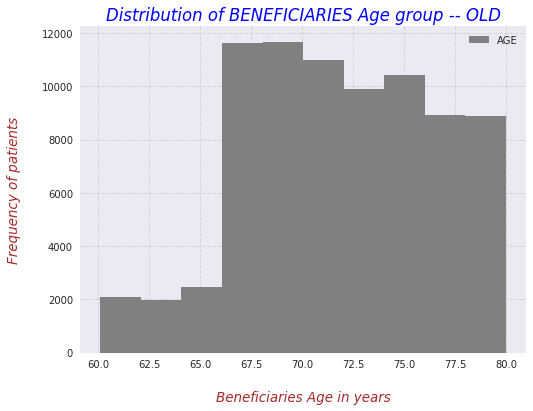

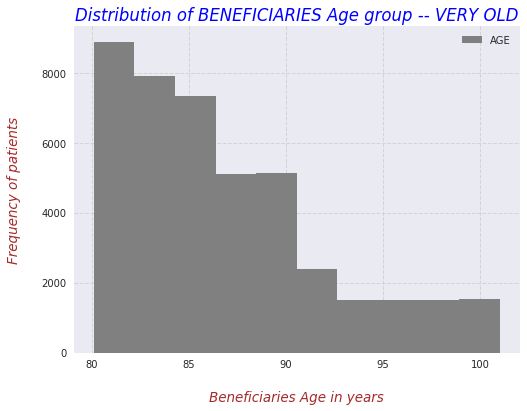

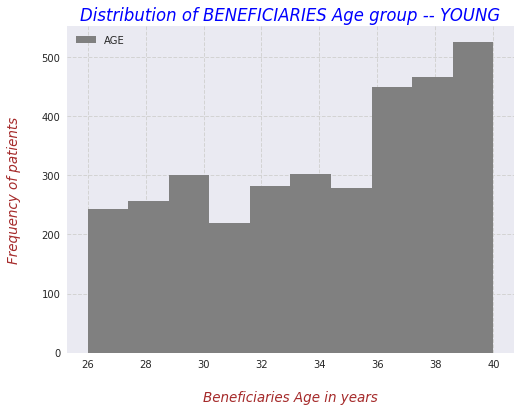

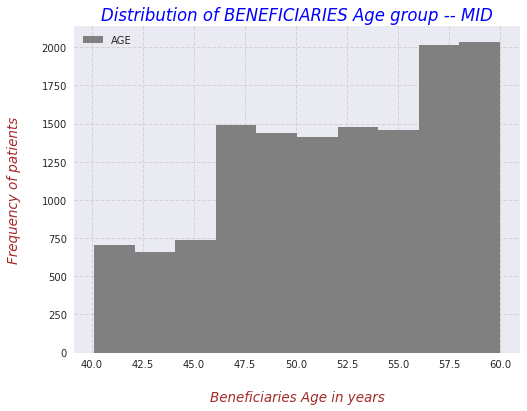

In [33]:
age_grps = list(train_bene_df['AGE_groups'].unique())
for grp in age_grps:
  # Here, I'm displaying the distribution of AGE GROUPS of Beneficiaries?
  with plt.style.context('seaborn'):
    plt.figure(figsize=(8,6))
    train_bene_df[train_bene_df['AGE_groups'] == grp]['AGE'].plot(kind='hist', color='grey')
    # Providing the labels and title to the graph
    plt.xlabel("\nBeneficiaries Age in years", fontdict=label_font_dict)
    plt.ylabel("Frequency of patients\n", fontdict=label_font_dict)
    plt.grid(which='major', linestyle="--", color='lightgrey')
    plt.minorticks_on()
    plt.title("Distribution of BENEFICIARIES Age group -- {}".format(str(grp).upper()), fontdict=title_font_dict)
    plt.legend()

- **`OBSERVATION`**
  - The above graphs tells us about the spread of beneficiaries across the Age Groups.
    - For YOUNG group we can say that the spread is quite even across the ages of beneficiaries.

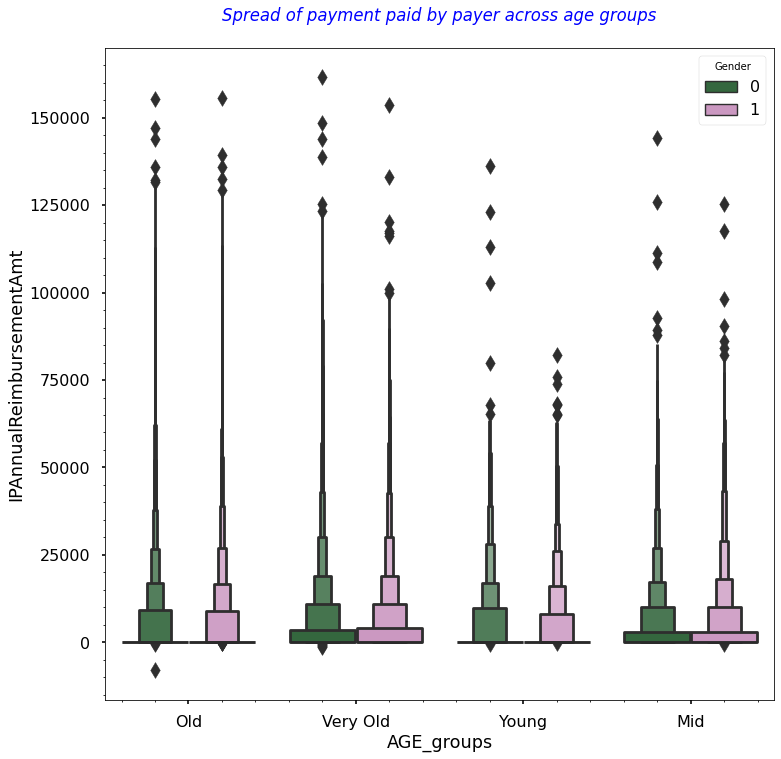

In [162]:
with plt.style.context('seaborn-poster'):
    plt.figure(figsize=(12,12))
    sns.boxenplot(data=train_bene_df, x='AGE_groups', y='IPAnnualReimbursementAmt', hue='Gender', palette='cubehelix')
    plt.minorticks_on()
    plt.title("Spread of payment paid by payer across age groups\n", fontdict=title_font_dict)

- **`OBSERVATION`**
  - The above graph shows us there is no such difference in the amounts across different AGE Groups.

- **(AGE GROUPS) , (OPAnnualReimbursementAmt) and (GENDER)**

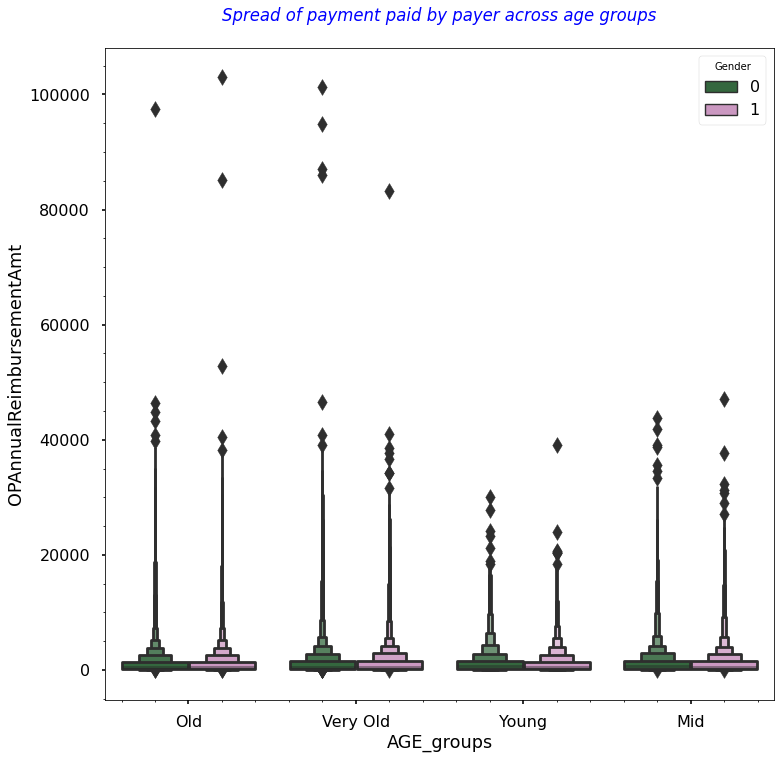

In [163]:
with plt.style.context('seaborn-poster'):
    plt.figure(figsize=(12,12))
    sns.boxenplot(data=train_bene_df, x='AGE_groups', y='OPAnnualReimbursementAmt', hue='Gender', palette='cubehelix')
    plt.minorticks_on()
    plt.title("Spread of payment paid by payer across age groups\n", fontdict=title_font_dict)

- **`OBSERVATION`**
  - The above graph shows us there is no such difference in the amounts across different AGE Groups.

- **(DOB MONTH) , (IPAnnualReimbursementAmt) and (GENDER)**

In [175]:
train_bene_df.to_csv("train_bene_1.csv")

In [176]:
train_bene_df = pd.read_csv("../input/healthcare-provider-fraud-detection-analysis/Train_Beneficiarydata-1542865627584.csv")
train_ip_df = pd.read_csv("../input/healthcare-provider-fraud-detection-analysis/Train_Inpatientdata-1542865627584.csv")
train_op_df = pd.read_csv("../input/healthcare-provider-fraud-detection-analysis/Train_Outpatientdata-1542865627584.csv")

## ***Records_counts_for_In-patient_&_Out-patient_Data***

- **In-patients**

In [177]:
train_ip_df.shape

(40474, 30)

In [178]:
train_ip_df.dtypes

BeneID                     object
ClaimID                    object
ClaimStartDt               object
ClaimEndDt                 object
Provider                   object
InscClaimAmtReimbursed      int64
AttendingPhysician         object
OperatingPhysician         object
OtherPhysician             object
AdmissionDt                object
ClmAdmitDiagnosisCode      object
DeductibleAmtPaid         float64
DischargeDt                object
DiagnosisGroupCode         object
ClmDiagnosisCode_1         object
ClmDiagnosisCode_2         object
ClmDiagnosisCode_3         object
ClmDiagnosisCode_4         object
ClmDiagnosisCode_5         object
ClmDiagnosisCode_6         object
ClmDiagnosisCode_7         object
ClmDiagnosisCode_8         object
ClmDiagnosisCode_9         object
ClmDiagnosisCode_10        object
ClmProcedureCode_1        float64
ClmProcedureCode_2        float64
ClmProcedureCode_3        float64
ClmProcedureCode_4        float64
ClmProcedureCode_5        float64
ClmProcedureCo

In [179]:
train_ip_df.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,71690,34590,V1581,32723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,431,1068.0,2009-02-22,067,43491,2762,7843,32723,V1041,4254,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,78321,1068.0,2009-08-30,975,042,3051,34400,5856,42732,486,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN


In [180]:
print("### Number of records where patient gets admitted --> {} ###".format(train_ip_df.shape[0]))

### Number of records where patient gets admitted --> 40474 ###


- **Out-patients**

In [181]:
train_op_df.shape

(517737, 27)

In [182]:
train_op_df.dtypes

BeneID                     object
ClaimID                    object
ClaimStartDt               object
ClaimEndDt                 object
Provider                   object
InscClaimAmtReimbursed      int64
AttendingPhysician         object
OperatingPhysician         object
OtherPhysician             object
ClmDiagnosisCode_1         object
ClmDiagnosisCode_2         object
ClmDiagnosisCode_3         object
ClmDiagnosisCode_4         object
ClmDiagnosisCode_5         object
ClmDiagnosisCode_6         object
ClmDiagnosisCode_7         object
ClmDiagnosisCode_8         object
ClmDiagnosisCode_9         object
ClmDiagnosisCode_10        object
ClmProcedureCode_1        float64
ClmProcedureCode_2        float64
ClmProcedureCode_3        float64
ClmProcedureCode_4        float64
ClmProcedureCode_5        float64
ClmProcedureCode_6        float64
DeductibleAmtPaid           int64
ClmAdmitDiagnosisCode      object
dtype: object

In [183]:
train_op_df.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,V5866,V1272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,30000,72887,4280,7197,V4577,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947


In [184]:
print("### Number of records where patients didn't gets admitted --> {} ###".format(train_op_df.shape[0]))

### Number of records where patients didn't gets admitted --> 517737 ###


- **Patient IDs who medicated with or without admission**

In [185]:
ip_bene_unq = set(train_ip_df['BeneID'])
op_bene_unq = set(train_op_df['BeneID'])

In [186]:
len(ip_bene_unq), len(op_bene_unq)

(31289, 133980)

- **Number of patients who either are in-patients or out-patients**

In [187]:
only_in_patients = ip_bene_unq.intersection(op_bene_unq)
len(only_in_patients)

26713

In [188]:
print("### Only admitted in-patients --> {} ###".format(len(only_in_patients)))

### Only admitted in-patients --> 26713 ###


In [189]:
only_out_patients = op_bene_unq.difference(ip_bene_unq)
len(only_out_patients)

107267

In [190]:
print("### Only out-patients --> {} ###".format(len(only_out_patients)))

### Only out-patients --> 107267 ###


In [191]:
patients_counts = pd.DataFrame([len(only_in_patients), len(only_out_patients)]).T
patients_counts.columns = ['Only In-patients', 'Only Out-patients']
patients_counts

,Only In-patients,Only Out-patients
0,26713,107267


In [192]:
tot_patients = len(only_in_patients) + len(only_out_patients)
tot_patients

133980

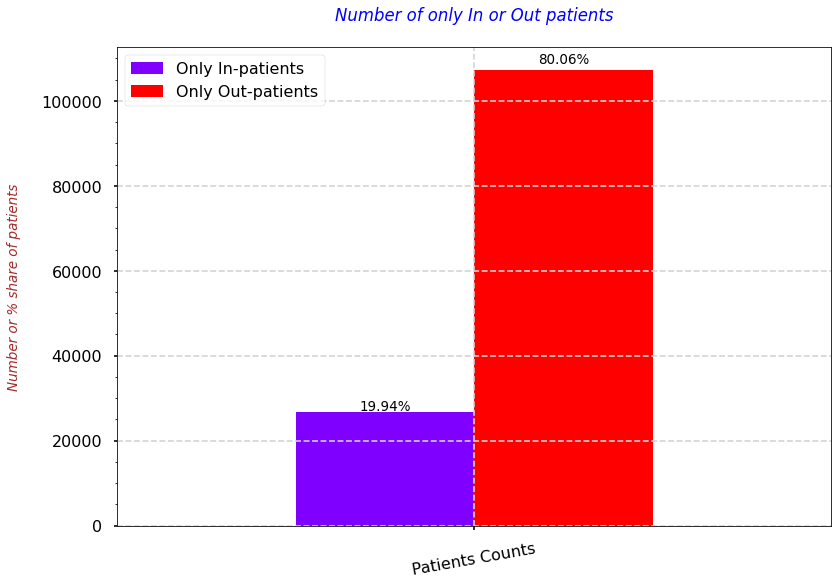

In [193]:
with plt.style.context('seaborn-poster'):
    fig = patients_counts.plot(kind='bar',colormap='rainbow')
    # Using the "patches" function we will get the location of the rectangle bars from the graph.
    ## Then by using those location(width & height) values we will add the annotations
    for p in fig.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        fig.annotate(f'{str(round((height*100)/tot_patients,2))+"%"}', (x + width/2, y + height*1.015), ha='center', fontsize=13.5)
    # Providing the labels and title to the graph
    plt.xticks(labels=["Patients Counts"], ticks=[0], rotation=10)
    plt.ylabel("Number or % share of patients\n", fontdict=label_font_dict)
    plt.grid(which='major', linestyle="--", color='lightgrey')
    plt.minorticks_on()
    plt.title("Number of only In or Out patients\n", fontdict=title_font_dict)
    plt.plot();

**`OBSERVATION`**
* From the above plot, we can decude that 80% of the patients gets medicared without even admission.

# ***Exploring the In-patients Data***

In [194]:
train_ip_df

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,71690,34590,V1581,32723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,431,1068.0,2009-02-22,067,43491,2762,7843,32723,V1041,4254,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,78321,1068.0,2009-08-30,975,042,3051,34400,5856,42732,486,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40469,BENE159167,CLM69886,2009-09-28,2009-10-02,PRV53671,7000,PHY345332,PHY319565,NaN,2009-09-28,2859,1068.0,2009-10-02,812,2851,2762,53550,V0254,V1005,5173,79092,70704,2869,4148,9904.0,NaN,NaN,NaN,NaN,NaN
40470,BENE159175,CLM74504,2009-11-03,2009-11-06,PRV54981,4000,PHY342806,PHY365497,NaN,2009-11-03,79902,1068.0,2009-11-06,228,42823,4148,4019,3970,4241,V1042,49122,4254,5990,NaN,8605.0,NaN,NaN,NaN,NaN,NaN
40471,BENE159177,CLM76485,2009-11-18,2009-11-22,PRV56588,3000,PHY423220,PHY332752,NaN,2009-11-18,78605,1068.0,2009-11-22,302,4280,3963,5859,4019,40390,4111,71534,71590,V4502,NaN,9390.0,NaN,NaN,NaN,NaN,NaN
40472,BENE159177,CLM79949,2009-12-17,2009-12-18,PRV56575,5000,PHY353156,NaN,NaN,2009-12-17,7802,1068.0,2009-12-18,309,7802,5859,496,2809,V1254,42822,4263,0414,41400,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- **NULL records in the in-patients data**

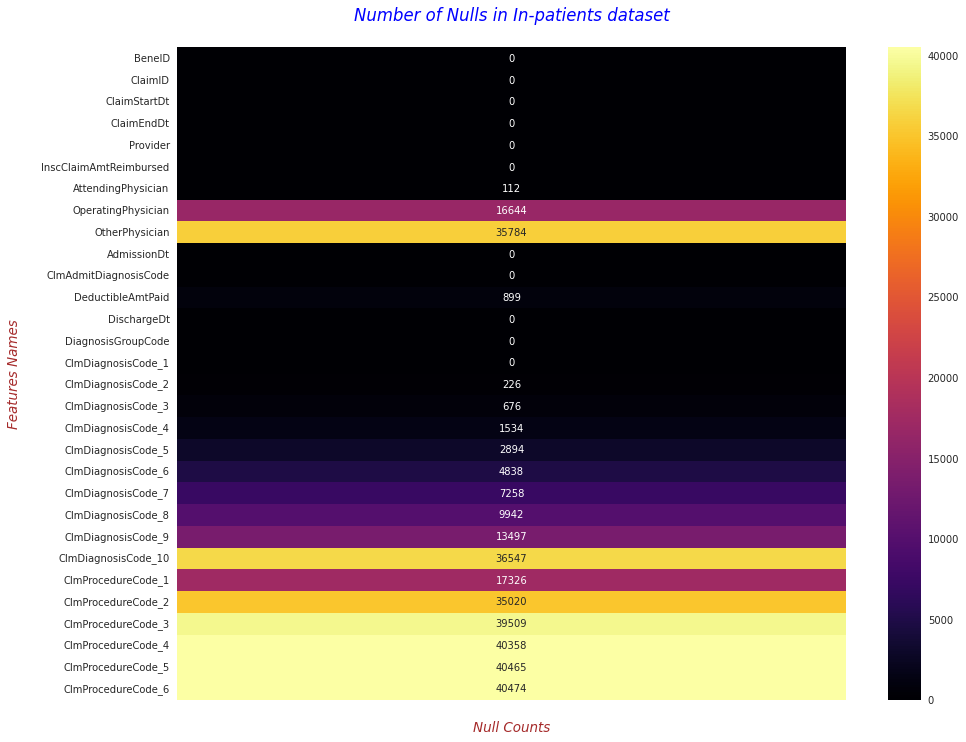

In [195]:
# Here, I'm displaying the number of only in-patients and out-patients
with plt.style.context('seaborn'):
    plt.figure(figsize=(15,12))
    fig = sns.heatmap(pd.DataFrame(train_ip_df.isnull().sum()), annot=True, fmt=".7g", cmap='inferno', cbar=True)
    # Providing the labels and title to the graph
    plt.xticks(labels=[" "], ticks=[0])
    plt.xlabel("Null Counts", fontdict=label_font_dict)
    plt.ylabel("Features Names\n", fontdict=label_font_dict)
    plt.minorticks_on()
    plt.title("Number of Nulls in In-patients dataset\n", fontdict=title_font_dict)
    plt.plot();

**`OBSERVATION`**
* From the above plot, we can see that the majority of the ProcedureCodes are having NULLS. And, ClmDiagnosisCode_10 is very rare among Patients.

- **Added Flag for indicating whether beneficiary admitted or not?**

In [196]:
train_ip_df["Admitted?"] = 1

- **Added Claim_Clearance_Days**

In [197]:
train_ip_df['ClaimStartDt'] = pd.to_datetime(train_ip_df['ClaimStartDt'], format="%Y-%m-%d")
train_ip_df['ClaimEndDt'] = pd.to_datetime(train_ip_df['ClaimEndDt'], format="%Y-%m-%d")

In [198]:
train_ip_df['Claim_Duration'] = (train_ip_df['ClaimEndDt'] - train_ip_df['ClaimStartDt']).dt.days

In [199]:
train_ip_df['Claim_Duration'].describe()

count    40474.000000
mean         5.660251
std          5.628873
min          0.000000
25%          2.000000
50%          4.000000
75%          7.000000
max         36.000000
Name: Claim_Duration, dtype: float64

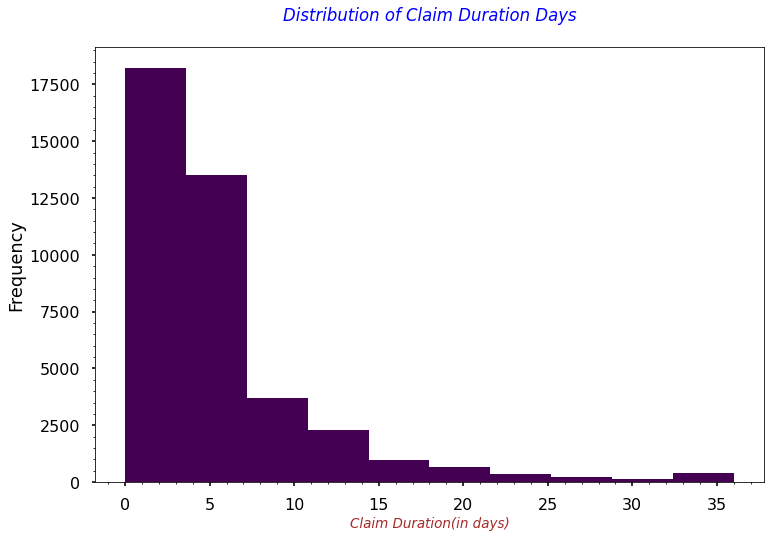

In [200]:
# Here, I'm displaying the number of only in-patients and out-patients
with plt.style.context('seaborn-poster'):
    plt.figure(figsize=(12,8))
    train_ip_df['Claim_Duration'].plot(kind='hist', colormap="viridis");
    # Providing the labels and title to the graph
    plt.xlabel("Claim Duration(in days)", fontdict=label_font_dict)
    plt.minorticks_on()
    plt.title("Distribution of Claim Duration Days\n", fontdict=title_font_dict)
    plt.plot();

**`OBSERVATION`**
* From the above plot, we can decude that the majority of the claims filed for less than 7 days.


- **Percentiles values**

In [201]:
for val in [0.1,0.2,0.25,0.3,0.4,0.5,0.6,0.7,0.75,0.8,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,0.999,0.9999,0.99999,0.999999,1.0]:
    percentile = round(float(val*100),6)
    percentile_val = round(train_ip_df["Claim_Duration"].quantile(val),1)
    print("Percentile --> {} and its value is --> {}".format(percentile,percentile_val))

Percentile --> 10.0 and its value is --> 1.0
Percentile --> 20.0 and its value is --> 2.0
Percentile --> 25.0 and its value is --> 2.0
Percentile --> 30.0 and its value is --> 3.0
Percentile --> 40.0 and its value is --> 3.0
Percentile --> 50.0 and its value is --> 4.0
Percentile --> 60.0 and its value is --> 5.0
Percentile --> 70.0 and its value is --> 6.0
Percentile --> 75.0 and its value is --> 7.0
Percentile --> 80.0 and its value is --> 8.0
Percentile --> 90.0 and its value is --> 12.0
Percentile --> 91.0 and its value is --> 13.0
Percentile --> 92.0 and its value is --> 14.0
Percentile --> 93.0 and its value is --> 14.0
Percentile --> 94.0 and its value is --> 15.0
Percentile --> 95.0 and its value is --> 17.0
Percentile --> 96.0 and its value is --> 18.0
Percentile --> 97.0 and its value is --> 21.0
Percentile --> 98.0 and its value is --> 25.0
Percentile --> 99.0 and its value is --> 32.0
Percentile --> 99.9 and its value is --> 35.0
Percentile --> 99.99 and its value is --> 35

**`OBSERVATION`**
* From the results, we can say that 95% of the claims are filed for 17 days.

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1735: UserWarning: You passed a edgecolor/edgecolors ([(1.0, 0.4980392156862745, 0.3137254901960784), (1.0, 0.4980392156862745, 0.3137254901960784), (1.0, 0.4980392156862745, 0.3137254901960784), (1.0, 0.4980392156862745, 0.3137254901960784), (1.0, 0.4980392156862745, 0.3137254901960784), (1.0, 0.4980392156862745, 0.3137254901960784), (1.0, 0.4980392156862745, 0.3137254901960784), (1.0, 0.4980392156862745, 0.3137254901960784), (1.0, 0.4980392156862745, 0.3137254901960784), (1.0, 0.4980392156862745, 0.3137254901960784), (1.0, 0.4980392156862745, 0.3137254901960784), (1.0, 0.4980392156862745, 0.3137254901960784), (1.0, 0.4980392156862745, 0.3137254901960784), (1.0, 0.4980392156862745, 0.3137254901960784), (1.0, 0.4980392156862745, 0.3137254901960784), (1.0, 0.4980392156862745, 0.3137254901960784), (1.0, 0.4980392156862745, 0.3137254901960784), (1.0, 0.4980392156862745, 0.3137254901960784), (1.0, 0.4980392156862745, 0.313725490

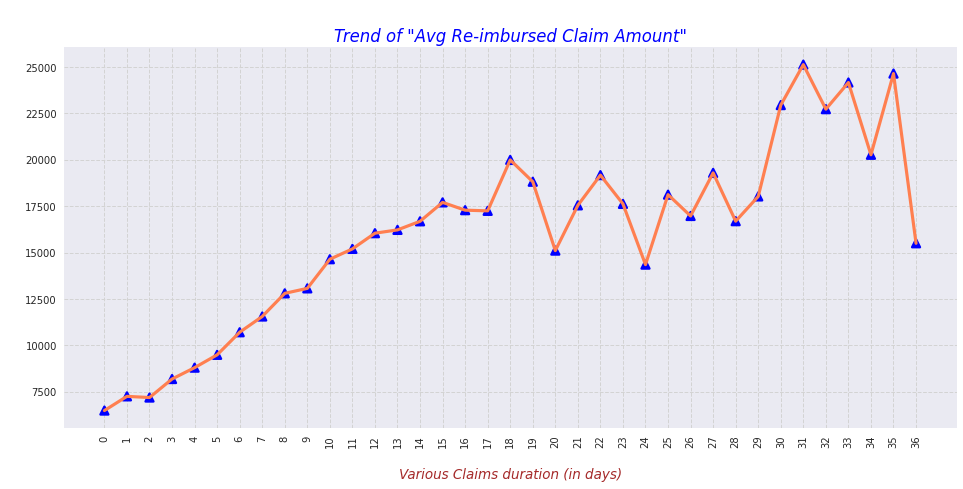

In [209]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(16,7))
    sns.pointplot(data=claim_clearance_amts, x='Claim_durations_in_days', y='Avg_Claim_Insc_Amount', 
                  color='blue', markers="^", linestyles="")
    sns.pointplot(data=claim_clearance_amts, x='Claim_durations_in_days', y='Avg_Claim_Insc_Amount', 
                  color='coral', markers="", linestyles="-")
    # Providing the labels and title to the graph
    plt.xticks(rotation=90)
    plt.xlabel("\nVarious Claims duration (in days)", fontdict= label_font_dict)
    plt.ylabel(" ", fontdict= label_font_dict)
    plt.grid(which='major', linestyle="--", color='lightgrey')
    plt.minorticks_on()
    plt.title('\nTrend of "Avg Re-imbursed Claim Amount"', fontdict=title_font_dict)
    plt.plot();

**`OBSERVATION`**
* The above graph tells us that as the claim duration increases then the Avg Re-imbursed Amount also increases, however, as we have already seen that total number of claims are very less when duration is greater than 15 days.

* Another thing to look here is that if the duration is b/w [30-35] then the Average Re-imbursed amount is very high and reaches its maximum.

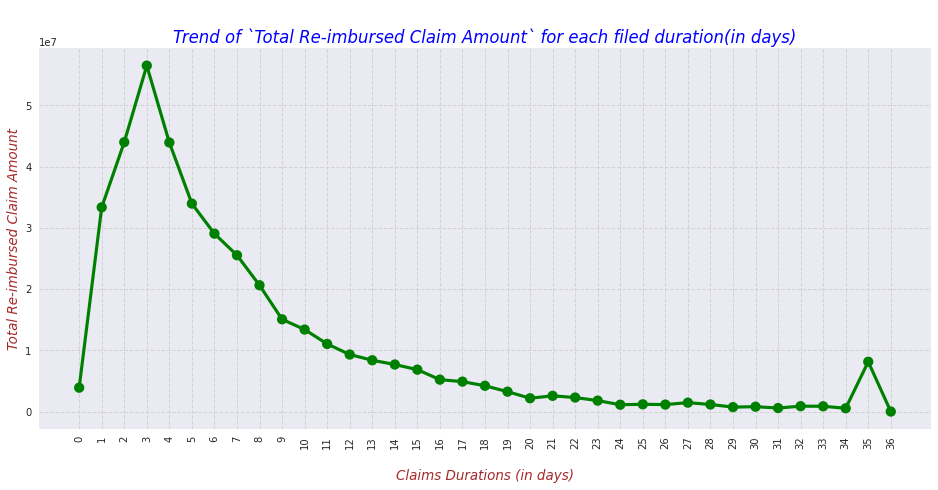

In [210]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(16,7))
    sns.pointplot(data=claim_clearance_amts, x='Claim_durations_in_days', y='All_Claims_Total_Amount', color='green')
    # Providing the labels and title to the graph
    plt.xticks(rotation=90)
    plt.xlabel("\nClaims Durations (in days)", fontdict= label_font_dict)
    plt.ylabel("Total Re-imbursed Claim Amount", fontdict= label_font_dict)
    plt.grid(which='major', linestyle="--", color='lightgrey')
    plt.minorticks_on()
    plt.title("\nTrend of `Total Re-imbursed Claim Amount` for each filed duration(in days)", fontdict=title_font_dict)
    plt.plot();

**`OBSERVATION`**
* The above graph tells us that the Total Re-imbursed Amount is the highest for 3 days claims

* And, for claims with durations from 12 to 34 the total re-imbursed amount is very less, however, for 35 days duration we can witness a clear spike that can be a potential sign of fraudulent.

# ***Exploring the Out-patients Data***


In [230]:
train_op_df.shape

(517737, 27)

- **NULL records in the in-patients data**

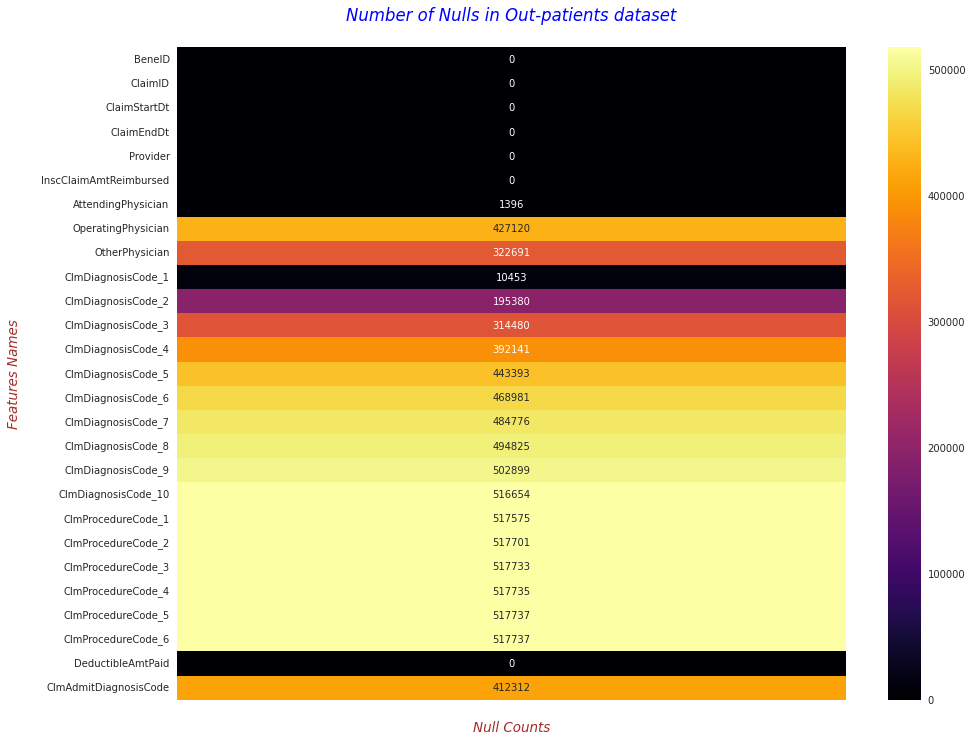

In [231]:
# Here, I'm displaying the number of only out-patients
with plt.style.context('seaborn'):
    plt.figure(figsize=(15,12))
    fig = sns.heatmap(pd.DataFrame(train_op_df.isnull().sum()), annot=True, fmt=".7g", cmap='inferno', cbar=True)
    # Providing the labels and title to the graph
    plt.xticks(labels=[" "], ticks=[0])
    plt.xlabel("Null Counts", fontdict=label_font_dict)
    plt.ylabel("Features Names\n", fontdict=label_font_dict)
    plt.minorticks_on()
    plt.title("Number of Nulls in Out-patients dataset\n", fontdict=title_font_dict)
    plt.plot();

**`OBSERVATION`**
* From the above plot, we can say that the majority of the ProcedureCodes are having NULLS. 

* ClmDiagnosisCode_9 & ClmDiagnosisCode_10 are very rare among Patients.

- **Added Flag for indicating whether beneficiary admitted or not?**

In [232]:
train_op_df["Admitted?"] = 0

- **Added Claim_Clearance_Days**

In [233]:
train_op_df['ClaimStartDt'] = pd.to_datetime(train_op_df['ClaimStartDt'], format="%Y-%m-%d")
train_op_df['ClaimEndDt'] = pd.to_datetime(train_op_df['ClaimEndDt'], format="%Y-%m-%d")

In [234]:
train_op_df['Claim_Duration'] = (train_op_df['ClaimEndDt'] - train_op_df['ClaimStartDt']).dt.days

In [235]:
train_op_df['Claim_Duration'].describe()

count    517737.000000
mean          1.420532
std           4.707387
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          23.000000
Name: Claim_Duration, dtype: float64

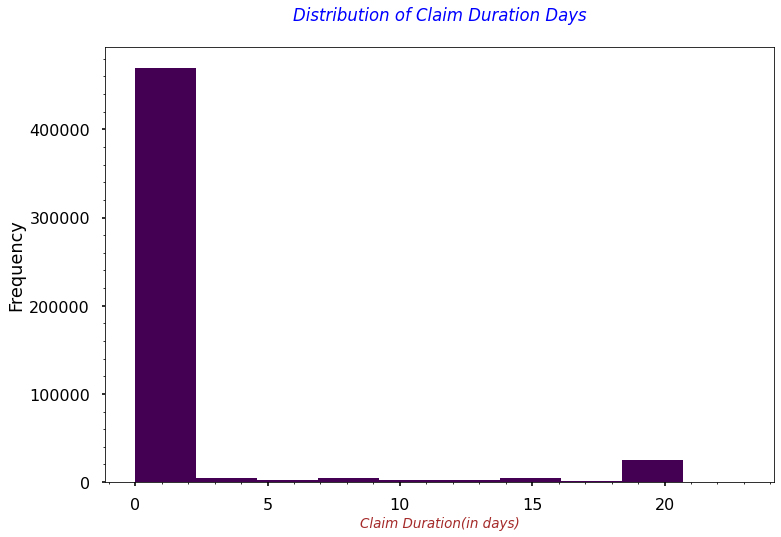

In [236]:
# Here, I'm displaying the number of only out-patients
with plt.style.context('seaborn-poster'):
    plt.figure(figsize=(12,8))
    train_op_df['Claim_Duration'].plot(kind='hist', colormap="viridis");
    # Providing the labels and title to the graph
    plt.xlabel("Claim Duration(in days)", fontdict=label_font_dict)
    plt.minorticks_on()
    plt.title("Distribution of Claim Duration Days\n", fontdict=title_font_dict)
    plt.plot();

**`OBSERVATION`**
* From the above plot, we can decude that the majority of the claims filed for less than or equals to 2 days.


- **Percentiles values**

In [237]:
for val in [0.1,0.2,0.25,0.3,0.4,0.5,0.6,0.7,0.75,0.8,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,0.999,0.9999,0.99999,0.999999,1.0]:
    percentile = round(float(val*100),6)
    percentile_val = round(train_op_df["Claim_Duration"].quantile(val),1)
    print("Percentile --> {} and its value is --> {}".format(percentile,percentile_val))

Percentile --> 10.0 and its value is --> 0.0
Percentile --> 20.0 and its value is --> 0.0
Percentile --> 25.0 and its value is --> 0.0
Percentile --> 30.0 and its value is --> 0.0
Percentile --> 40.0 and its value is --> 0.0
Percentile --> 50.0 and its value is --> 0.0
Percentile --> 60.0 and its value is --> 0.0
Percentile --> 70.0 and its value is --> 0.0
Percentile --> 75.0 and its value is --> 0.0
Percentile --> 80.0 and its value is --> 0.0
Percentile --> 90.0 and its value is --> 2.0
Percentile --> 91.0 and its value is --> 3.0
Percentile --> 92.0 and its value is --> 6.0
Percentile --> 93.0 and its value is --> 9.0
Percentile --> 94.0 and its value is --> 14.0
Percentile --> 95.0 and its value is --> 17.0
Percentile --> 96.0 and its value is --> 20.0
Percentile --> 97.0 and its value is --> 20.0
Percentile --> 98.0 and its value is --> 20.0
Percentile --> 99.0 and its value is --> 20.0
Percentile --> 99.9 and its value is --> 20.0
Percentile --> 99.99 and its value is --> 20.0
P

**`OBSERVATION`**
* From the results, we can say that 90% of the claims are filed for 2 days.

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1735: UserWarning: You passed a edgecolor/edgecolors ([(1.0, 0.4980392156862745, 0.3137254901960784), (1.0, 0.4980392156862745, 0.3137254901960784), (1.0, 0.4980392156862745, 0.3137254901960784), (1.0, 0.4980392156862745, 0.3137254901960784), (1.0, 0.4980392156862745, 0.3137254901960784), (1.0, 0.4980392156862745, 0.3137254901960784), (1.0, 0.4980392156862745, 0.3137254901960784), (1.0, 0.4980392156862745, 0.3137254901960784), (1.0, 0.4980392156862745, 0.3137254901960784), (1.0, 0.4980392156862745, 0.3137254901960784), (1.0, 0.4980392156862745, 0.3137254901960784), (1.0, 0.4980392156862745, 0.3137254901960784), (1.0, 0.4980392156862745, 0.3137254901960784), (1.0, 0.4980392156862745, 0.3137254901960784), (1.0, 0.4980392156862745, 0.3137254901960784), (1.0, 0.4980392156862745, 0.3137254901960784), (1.0, 0.4980392156862745, 0.3137254901960784), (1.0, 0.4980392156862745, 0.3137254901960784), (1.0, 0.4980392156862745, 0.313725490

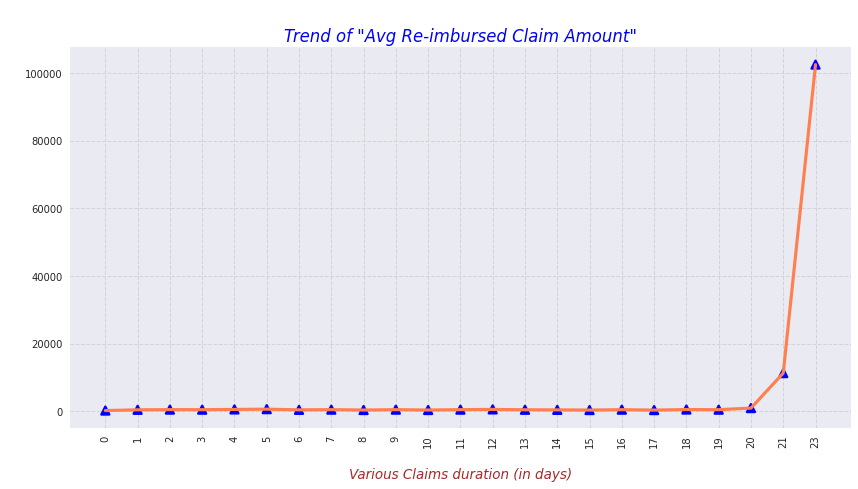

In [249]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(14,7))
    sns.pointplot(data=claim_clearance_amts, x='Claim_durations_in_days', y='Avg_Claim_Insc_Amount', 
                  color='blue', markers="^", linestyles="")
    sns.pointplot(data=claim_clearance_amts, x='Claim_durations_in_days', y='Avg_Claim_Insc_Amount', 
                  color='coral', markers="", linestyles="-")
    # Providing the labels and title to the graph
    plt.xticks(rotation=90)
    plt.xlabel("\nVarious Claims duration (in days)", fontdict= label_font_dict)
    plt.ylabel(" ", fontdict= label_font_dict)
    plt.grid(which='major', linestyle="--", color='lightgrey')
    plt.minorticks_on()
    plt.title('\nTrend of "Avg Re-imbursed Claim Amount"', fontdict=title_font_dict)
    plt.plot();

**`OBSERVATION`**
* The above graph tells us that the Average Re-imbursed Amount is same throughout the various durations except for 21 and 23 days.

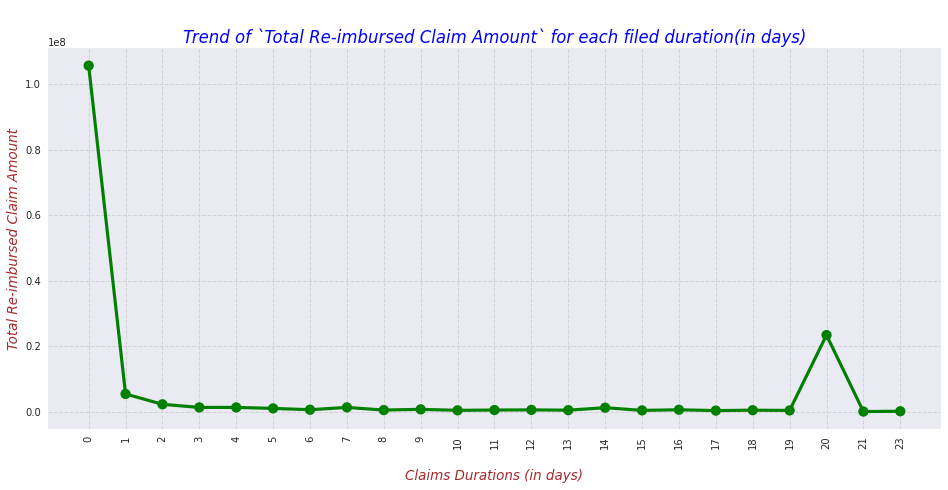

In [250]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(16,7))
    sns.pointplot(data=claim_clearance_amts, x='Claim_durations_in_days', y='All_Claims_Total_Amount', color='green')
    # Providing the labels and title to the graph
    plt.xticks(rotation=90)
    plt.xlabel("\nClaims Durations (in days)", fontdict= label_font_dict)
    plt.ylabel("Total Re-imbursed Claim Amount", fontdict= label_font_dict)
    plt.grid(which='major', linestyle="--", color='lightgrey')
    plt.minorticks_on()
    plt.title("\nTrend of `Total Re-imbursed Claim Amount` for each filed duration(in days)", fontdict=title_font_dict)
    plt.plot();

**`OBSERVATION`**
* The above graph tells us that the Total Re-imbursed Amount is the highest for 0 days claims.

* And, for claims with durations from 2 to 19 the total re-imbursed amount is very less or similar, however, for 20 days duration we can witness a clear spike that can be a potential sign of fraudulent.

# **Entire Data -- EDA**

In [263]:
train_bene_df = pd.read_csv("../input/healthcare-provider-fraud-detection-analysis/Train_Beneficiarydata-1542865627584.csv")
train_ip_df = pd.read_csv("../input/healthcare-provider-fraud-detection-analysis/Train_Inpatientdata-1542865627584.csv")
train_op_df = pd.read_csv("../input/healthcare-provider-fraud-detection-analysis/Train_Outpatientdata-1542865627584.csv")
train_tgt_lbls_df = pd.read_csv("../input/healthcare-provider-fraud-detection-analysis/Train-1542865627584.csv")

## ***Exploring_Target_Labels_Data***

In [264]:
train_tgt_lbls_df.head()

,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes
2,PRV51004,No
3,PRV51005,Yes
4,PRV51007,No


* **Check the Fraud and Non-Fraud Counts**

In [265]:
print("### The unique number of providers are {}. ###".format(train_tgt_lbls_df.shape[0]))

### The unique number of providers are 5410. ###


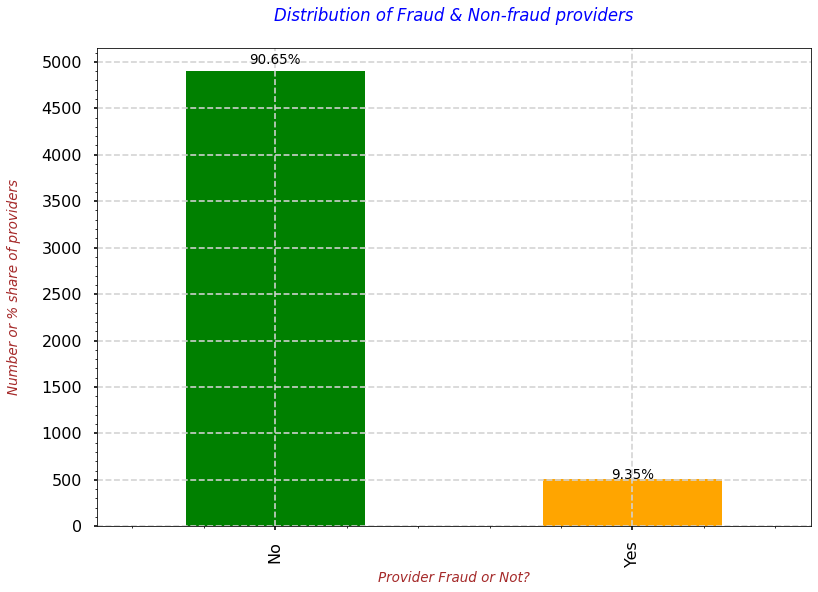

In [266]:
with plt.style.context('seaborn-poster'):
    fig = train_tgt_lbls_df["PotentialFraud"].value_counts().plot(kind='bar', color=['green','orange'])
    # Using the "patches" function we will get the location of the rectangle bars from the graph.
    ## Then by using those location(width & height) values we will add the annotations
    for p in fig.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        fig.annotate(f'{str(round((height*100)/train_tgt_lbls_df.shape[0],2))+"%"}', (x + width/2, y + height*1.015), ha='center', fontsize=13.5)
    # Providing the labels and title to the graph
    plt.xlabel("Provider Fraud or Not?", fontdict=label_font_dict)
    plt.ylabel("Number or % share of providers\n", fontdict=label_font_dict)
    plt.yticks(np.arange(0,5100,500))
    plt.grid(which='major', linestyle="--", color='lightgrey')
    plt.minorticks_on()
    plt.title("Distribution of Fraud & Non-fraud providers\n", fontdict=title_font_dict)
    plt.plot();

**`OBSERVATION`**
* From the above plot, we can say that 90% of the providers are not frausters and only 9% of them are involved in frauds.

### **Adding the `Admitted` or `Not Admitted` indicator in IP and OP Dataset**

* **Adding in IP Dataset**

In [267]:
train_ip_df["Admitted?"] = 1

In [268]:
train_ip_df.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,...,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,Admitted?
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,...,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,6186,1068.0,2009-09-02,750,6186,...,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN,1
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,29590,1068.0,2009-09-20,883,29623,...,71690,34590,V1581,32723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,431,1068.0,2009-02-22,067,43491,...,7843,32723,V1041,4254,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN,1
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,78321,1068.0,2009-08-30,975,042,...,34400,5856,42732,486,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN,1


* **Adding in OP Dataset**

In [269]:
train_op_df["Admitted?"] = 0

In [270]:
train_op_df.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode,Admitted?
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,V5866,V1272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409,0
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380,0
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,30000,72887,4280,7197,V4577,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947,0


### **Merging the Datasets**

In [271]:
# Commom columns must be 28
common_cols = [col for col in train_ip_df.columns if col in train_op_df.columns]
len(common_cols)

28

In [272]:
# Merging the IP and OP dataset on the basis of common columns
train_ip_op_df = pd.merge(left=train_ip_df, right=train_op_df, left_on=common_cols, right_on=common_cols, how="outer")
train_ip_op_df.shape

(558211, 31)

In [273]:
train_ip_op_df.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,...,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,Admitted?
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,...,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,6186,1068.0,2009-09-02,750,6186,...,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN,1
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,29590,1068.0,2009-09-20,883,29623,...,71690,34590,V1581,32723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,431,1068.0,2009-02-22,067,43491,...,7843,32723,V1041,4254,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN,1
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,78321,1068.0,2009-08-30,975,042,...,34400,5856,42732,486,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN,1


### **Merging the IP_OP Dataset with BENE Data**

In [274]:
# Joining the IP_OP dataset with the BENE data
train_ip_op_bene_df = pd.merge(left=train_ip_op_df, right=train_bene_df, left_on='BeneID', right_on='BeneID',how='inner')
train_ip_op_bene_df.shape

(558211, 55)

### **Entire Dataset**

In [276]:
train_iobp_df.shape

(558211, 56)

In [277]:
# Unique Providers
train_iobp_df["Provider"].nunique()

5410

In [278]:
# Unique Claim numbers
train_iobp_df["ClaimID"].nunique()

558211

In [279]:
prvs_claims_df = pd.DataFrame(train_iobp_df.groupby(['Provider'])['ClaimID'].count()).reset_index()
prvs_claims_tgt_lbls_df = pd.merge(left=prvs_claims_df, right=train_tgt_lbls_df, on='Provider', how='inner')
prvs_claims_tgt_lbls_df

,Provider,ClaimID,PotentialFraud
0,PRV51001,25,No
1,PRV51003,132,Yes
2,PRV51004,149,No
3,PRV51005,1165,Yes
4,PRV51007,72,No
...,...,...,...
5405,PRV57759,28,No
5406,PRV57760,22,No
5407,PRV57761,82,No
5408,PRV57762,1,No


     PotentialFraud
No           345415
Yes          212796 



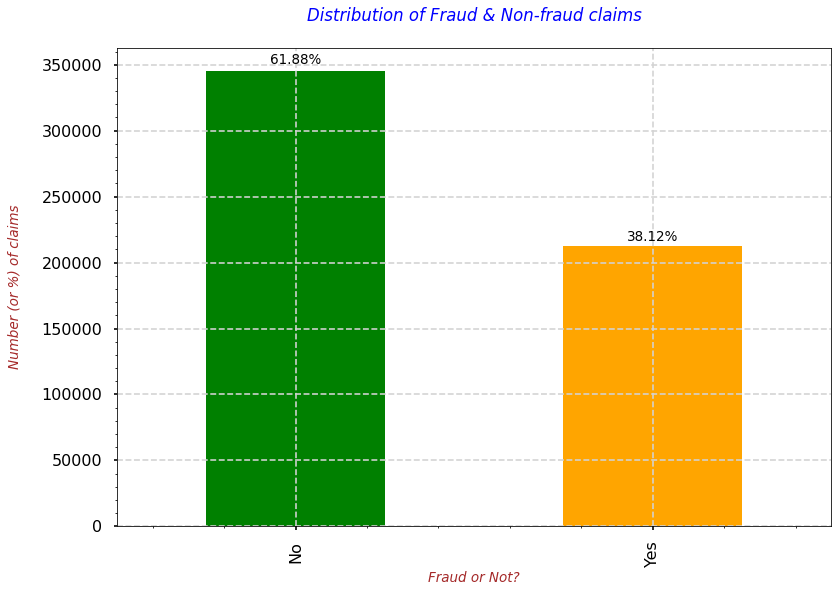

In [280]:
print(pd.DataFrame(train_iobp_df['PotentialFraud'].value_counts()), "\n")

with plt.style.context('seaborn-poster'):
    fig = train_iobp_df['PotentialFraud'].value_counts().plot(kind='bar', color=['green','orange'])
    # Using the "patches" function we will get the location of the rectangle bars from the graph.
    ## Then by using those location(width & height) values we will add the annotations
    for p in fig.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        fig.annotate(f'{str(round((height*100)/train_iobp_df.shape[0],2))+"%"}', (x + width/2, y + height*1.015), ha='center', fontsize=13.5)
    # Providing the labels and title to the graph
    plt.xlabel("Fraud or Not?", fontdict=label_font_dict)
    plt.ylabel("Number (or %) of claims\n", fontdict=label_font_dict)
    plt.grid(which='major', linestyle="--", color='lightgrey')
    plt.minorticks_on()
    plt.title("Distribution of Fraud & Non-fraud claims\n", fontdict=title_font_dict)
    plt.plot();

# **Feature Engineering + Impact Analysis**
**`Let's create some features`**

### **Adding `New Feature` :: `Is_Alive?`**

    - Is Alive? = No if DOD is NaN else Yes

In [281]:
train_iobp_df['DOB'] = pd.to_datetime(train_iobp_df['DOB'], format="%Y-%m-%d")
train_iobp_df['DOD'] = pd.to_datetime(train_iobp_df['DOD'], format="%Y-%m-%d")

In [282]:
train_iobp_df['Is_Alive?'] = train_iobp_df['DOD'].apply(lambda val: 'No' if val != val else 'Yes')

In [283]:
train_iobp_df['Is_Alive?'].value_counts()

No     554080
Yes      4131
Name: Is_Alive?, dtype: int64

### **Adding `New Feature` :: `Claim_Duration`**
    
    - Claim Duration = Claim End Date - Claim Start Date

In [284]:
train_iobp_df['ClaimStartDt'] = pd.to_datetime(train_iobp_df['ClaimStartDt'], format="%Y-%m-%d")
train_iobp_df['ClaimEndDt'] = pd.to_datetime(train_iobp_df['ClaimEndDt'], format="%Y-%m-%d")

train_iobp_df['Claim_Duration'] = (train_iobp_df['ClaimEndDt'] - train_iobp_df['ClaimStartDt']).dt.days

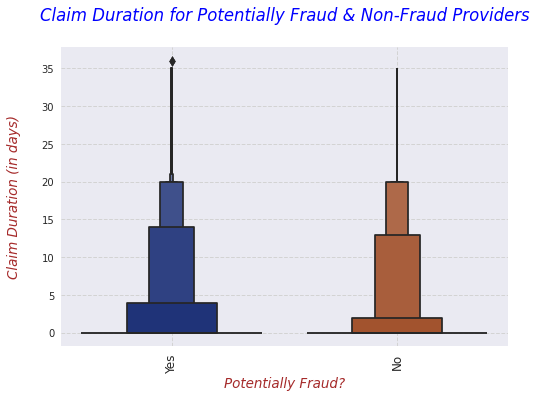

In [285]:
with plt.style.context('seaborn'):
    fig = sns.boxenplot(data=train_iobp_df, x='PotentialFraud',y='Claim_Duration', palette='dark')
    # Providing the labels and title to the graph
    plt.xlabel("Potentially Fraud?", fontdict=label_font_dict)
    plt.xticks(rotation=90, fontsize=12)
    plt.ylabel("Claim Duration (in days)\n", fontdict=label_font_dict)
    plt.minorticks_on()
    plt.grid(which='major', linestyle="--", color='lightgrey')
    plt.title("Claim Duration for Potentially Fraud & Non-Fraud Providers\n", fontdict=title_font_dict)
    plt.plot();

**`OBSERVATION`**
* The above plot clearly shows us that there is no difference in the distribution of Claim Duration for Potentially Fraud and Non-Fraud Providers.
    * Therefore, we can say that Claim Duration alone might not be useful in segregating the Fraud cases.

- **Relationship b/w `Claim_Duration` and `Potentially Fraud` for both the `Genders`**

# **`Some trends`**

### **Q1. Which are the Top-25 `Providers` with maximum number of fraudulent cases?**

In [382]:
tmp = pd.DataFrame(train_iobp_df.groupby(['Provider','PotentialFraud'])['BeneID'].count()).reset_index()
tmp.columns = ['Provider', 'Fraud?', 'Num_of_cases']
tot_fraud_cases = tmp[tmp['Fraud?'] == 'Yes']['Num_of_cases'].sum()
tot_non_fraud_cases = tmp[tmp['Fraud?'] == 'No']['Num_of_cases'].sum()
tmp['Cases'] = tmp['Fraud?'].apply(lambda val: tot_non_fraud_cases if val == "No" else tot_fraud_cases)
tmp['Percentage'] = round(((tmp['Num_of_cases'] / tmp['Cases']) * 100),2)

tmp.head()

,Provider,Fraud?,Num_of_cases,Cases,Percentage
0,PRV51001,No,25,345415,0.01
1,PRV51003,Yes,132,212796,0.06
2,PRV51004,No,149,345415,0.04
3,PRV51005,Yes,1165,212796,0.55
4,PRV51007,No,72,345415,0.02


In [383]:
tmp_only_frauds = tmp[tmp['Fraud?'] == 'Yes'].sort_values(by=['Percentage'], ascending=False).reset_index(drop=True)

    Provider  Num_of_cases  Percentage
0   PRV51459          8240        3.87
1   PRV53797          4739        2.23
2   PRV51574          4444        2.09
3   PRV53918          3588        1.69
4   PRV54895          3436        1.61
5   PRV55215          3393        1.59
6   PRV52064          2844        1.34
7   PRV56011          2833        1.33
8   PRV55004          2399        1.13
9   PRV56560          2313        1.09
10  PRV57306          2315        1.09
11  PRV52030          2275        1.07
12  PRV52649          2156        1.01
13  PRV54772          2115        0.99
14  PRV52628          2098        0.99
15  PRV51369          2083        0.98
16  PRV51347          2067        0.97
17  PRV55039          2058        0.97
18  PRV57103          2049        0.96
19  PRV52019          1961        0.92
20  PRV51480          1924        0.90
21  PRV55462          1907        0.90
22  PRV52041          1885        0.89
23  PRV55467          1896        0.89
24  PRV54742          189

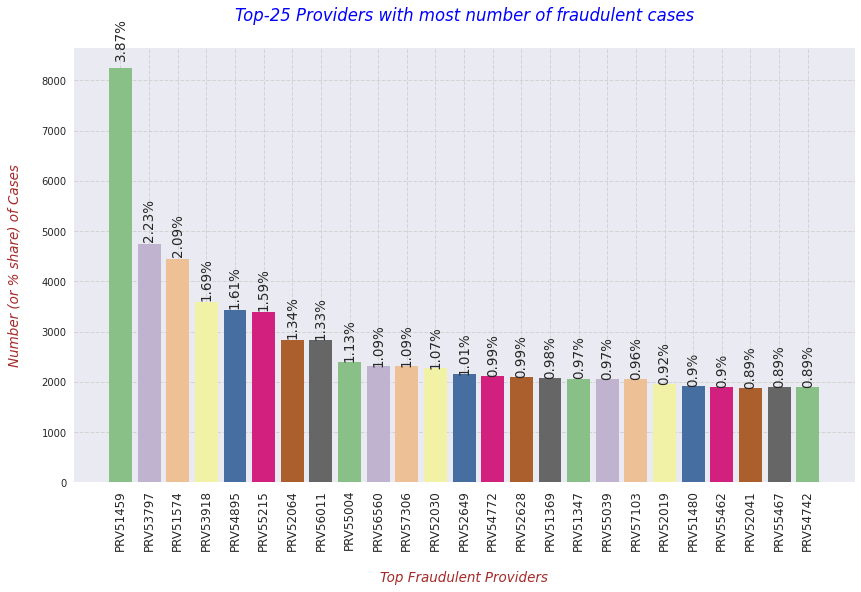

In [384]:
print(tmp_only_frauds[['Provider','Num_of_cases','Percentage']].head(25), "\n")

with plt.style.context('seaborn'):
    plt.figure(figsize=(14,8))
    fig = sns.barplot(data=tmp_only_frauds.iloc[0:25], x="Provider", y="Num_of_cases", palette='Accent')
    # Using the "patches" function we will get the location of the rectangle bars from the graph.
    ## Then by using those location(width & height) values we will add the annotations
    for p in fig.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        fig.annotate(f'{str(round((height*100)/tot_fraud_cases,2))+"%"}', (x + width/2, y + height*1.025), ha='center', fontsize=13.5, rotation=90)
    
    # Providing the labels and title to the graph
    plt.xlabel("\nTop Fraudulent Providers", fontdict=label_font_dict)
    plt.xticks(rotation=90, fontsize=12)
    plt.ylabel("Number (or % share) of Cases\n", fontdict=label_font_dict)
    plt.minorticks_on()
    plt.grid(which='major', linestyle="--", color='lightgrey')
    plt.title("Top-25 Providers with most number of fraudulent cases\n", fontdict=title_font_dict)
    plt.plot();

**`OBSERVATION`**
* The above plot shows us the Top-25 Providers with most percentage of Fraudulent Case Submissions.
    * Here, PRV51459 has the highest percentage share of fraudulent cases. The, difference b/w others providers is not that high.

### **Q2. Which are the Top-25 `Providers` with maximum number of non-fraudulent cases?**

In [385]:
tmp_only_non_frauds = tmp[tmp['Fraud?'] == 'No'].sort_values(by=['Percentage'], ascending=False).reset_index(drop=True)

    Provider  Num_of_cases  Percentage
0   PRV53750          1245        0.36
1   PRV55552          1206        0.35
2   PRV53394          1215        0.35
3   PRV53871          1220        0.35
4   PRV52001          1177        0.34
5   PRV52104          1189        0.34
6   PRV56559          1113        0.32
7   PRV56006          1090        0.32
8   PRV54813          1056        0.31
9   PRV52631          1057        0.31
10  PRV51509          1030        0.30
11  PRV56270          1043        0.30
12  PRV54332           995        0.29
13  PRV52605          1000        0.29
14  PRV53702          1010        0.29
15  PRV57333          1004        0.29
16  PRV55525           933        0.27
17  PRV56248           934        0.27
18  PRV57348           920        0.27
19  PRV52395           912        0.26
20  PRV56243           909        0.26
21  PRV52859           911        0.26
22  PRV53700           913        0.26
23  PRV55510           861        0.25
24  PRV54374           85

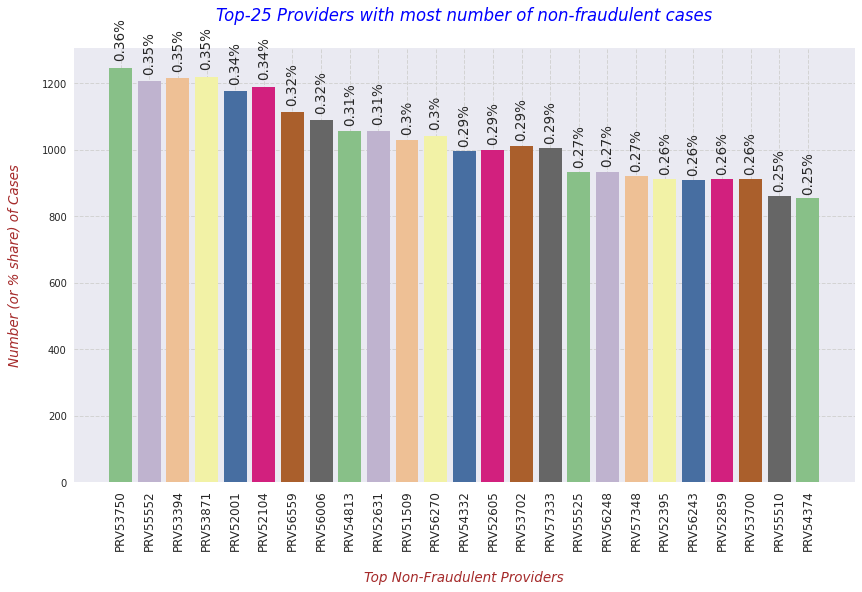

In [386]:
print(tmp_only_non_frauds[['Provider','Num_of_cases','Percentage']].head(25), "\n")

with plt.style.context('seaborn'):
    plt.figure(figsize=(14,8))
    fig = sns.barplot(data=tmp_only_non_frauds.iloc[0:25], x="Provider", y="Num_of_cases", palette='Accent')
    # Using the "patches" function we will get the location of the rectangle bars from the graph.
    ## Then by using those location(width & height) values we will add the annotations
    for p in fig.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        fig.annotate(f'{str(round((height*100)/tot_non_fraud_cases,2))+"%"}', (x + width/2, y + height*1.025), ha='center', fontsize=13.5, rotation=90)
    
    # Providing the labels and title to the graph
    plt.xlabel("\nTop Non-Fraudulent Providers", fontdict=label_font_dict)
    plt.xticks(rotation=90, fontsize=12)
    plt.ylabel("Number (or % share) of Cases\n", fontdict=label_font_dict)
    plt.minorticks_on()
    plt.grid(which='major', linestyle="--", color='lightgrey')
    plt.title("Top-25 Providers with most number of non-fraudulent cases\n", fontdict=title_font_dict)
    plt.plot();

**`OBSERVATION`**
* The above plot shows us the Top-25 Providers with most percentage of Non-Fraudulent Case Submissions.
    * Here, PRV53750 has the highest percentage share of non-fraudulent cases. But, the difference with other providers is not so high.

### **Q3. Which are the Top-25 `Attending Physicians` with maximum number of fraudulent cases?**

In [387]:
tmp = pd.DataFrame(train_iobp_df.groupby(['AttendingPhysician','PotentialFraud'])['BeneID'].count()).reset_index()
tmp.columns = ['AttendingPhysician', 'Fraud?', 'Num_of_cases']
tot_fraud_cases = tmp[tmp['Fraud?'] == 'Yes']['Num_of_cases'].sum()
tot_non_fraud_cases = tmp[tmp['Fraud?'] == 'No']['Num_of_cases'].sum()
tmp['Cases'] = tmp['Fraud?'].apply(lambda val: tot_non_fraud_cases if val == "No" else tot_fraud_cases)
tmp['Percentage'] = round(((tmp['Num_of_cases'] / tmp['Cases']) * 100),2)

tmp.head()

,AttendingPhysician,Fraud?,Num_of_cases,Cases,Percentage
0,PHY311001,No,2,344471,0.0
1,PHY311002,Yes,1,212232,0.0
2,PHY311004,No,2,344471,0.0
3,PHY311005,No,2,344471,0.0
4,PHY311006,No,1,344471,0.0


In [388]:
tmp_only_frauds = tmp[tmp['Fraud?'] == 'Yes'].sort_values(by=['Percentage'], ascending=False).reset_index(drop=True)

   AttendingPhysician  Num_of_cases  Percentage
0           PHY330576          2534        1.19
1           PHY350277          1628        0.77
2           PHY412132          1321        0.62
3           PHY423534          1223        0.58
4           PHY314027          1200        0.57
5           PHY327046          1181        0.56
6           PHY338032          1158        0.55
7           PHY357120          1156        0.54
8           PHY337425          1156        0.54
9           PHY341578          1133        0.53
10          PHY432650          1093        0.52
11          PHY347064          1076        0.51
12          PHY344389          1000        0.47
13          PHY383481          1005        0.47
14          PHY415321          1002        0.47
15          PHY433436           924        0.44
16          PHY375453           880        0.41
17          PHY387126           762        0.36
18          PHY357307           737        0.35
19          PHY318667           711     

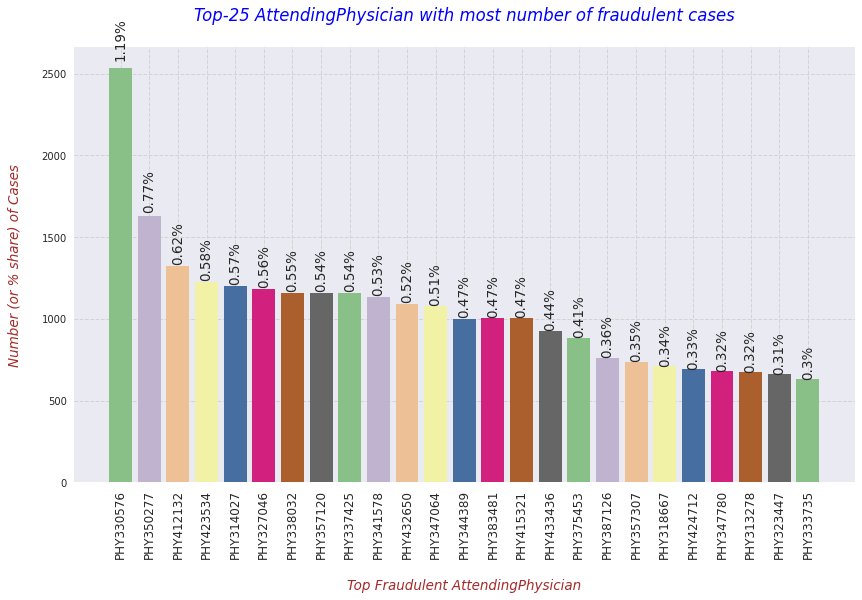

In [389]:
print(tmp_only_frauds[['AttendingPhysician','Num_of_cases','Percentage']].head(25), "\n")

with plt.style.context('seaborn'):
    plt.figure(figsize=(14,8))
    fig = sns.barplot(data=tmp_only_frauds.iloc[0:25], x="AttendingPhysician", y="Num_of_cases", palette='Accent')
    # Using the "patches" function we will get the location of the rectangle bars from the graph.
    ## Then by using those location(width & height) values we will add the annotations
    for p in fig.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        fig.annotate(f'{str(round((height*100)/tot_fraud_cases,2))+"%"}', (x + width/2, y + height*1.025), ha='center', fontsize=13.5, rotation=90)
    
    # Providing the labels and title to the graph
    plt.xlabel("\nTop Fraudulent AttendingPhysician", fontdict=label_font_dict)
    plt.xticks(rotation=90, fontsize=12)
    plt.ylabel("Number (or % share) of Cases\n", fontdict=label_font_dict)
    plt.minorticks_on()
    plt.grid(which='major', linestyle="--", color='lightgrey')
    plt.title("Top-25 AttendingPhysician with most number of fraudulent cases\n", fontdict=title_font_dict)
    plt.plot();

**`OBSERVATION`**
* The above plot shows us the Top-25 Attenting Physicians with most percentage of Fraudulent Case Submissions.
    * Here, PHY330576 has the highest percentage share of fraudulent cases. But, the difference b/w other physicians is not so high.

### **Q4. Which are the Top-25 `Attenting Physicians` with maximum number of non-fraudulent cases?**

In [390]:
tmp_only_non_frauds = tmp[tmp['Fraud?'] == 'No'].sort_values(by=['Percentage'], ascending=False).reset_index(drop=True)

   AttendingPhysician  Num_of_cases  Percentage
0           PHY351121          1053        0.31
1           PHY375943           912        0.26
2           PHY432614           716        0.21
3           PHY389456           673        0.20
4           PHY326984           686        0.20
5           PHY362889           674        0.20
6           PHY373032           618        0.18
7           PHY367255           634        0.18
8           PHY356444           600        0.17
9           PHY360179           583        0.17
10          PHY405720           544        0.16
11          PHY342223           503        0.15
12          PHY387900           514        0.15
13          PHY430054           513        0.15
14          PHY361063           470        0.14
15          PHY326049           445        0.13
16          PHY388040           447        0.13
17          PHY351973           426        0.12
18          PHY318242           422        0.12
19          PHY328307           402     

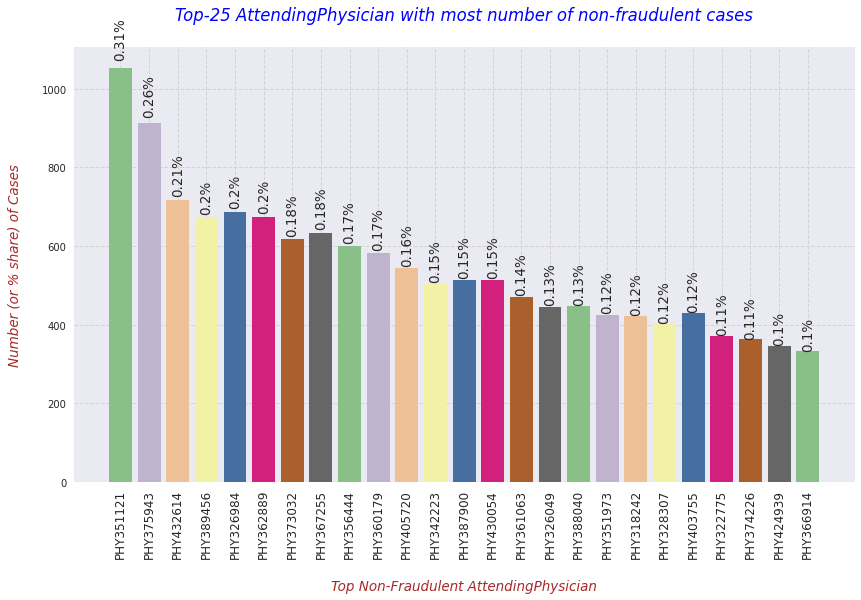

In [391]:
print(tmp_only_non_frauds[['AttendingPhysician','Num_of_cases','Percentage']].head(25), "\n")

with plt.style.context('seaborn'):
    plt.figure(figsize=(14,8))
    fig = sns.barplot(data=tmp_only_non_frauds.iloc[0:25], x="AttendingPhysician", y="Num_of_cases", palette='Accent')
    # Using the "patches" function we will get the location of the rectangle bars from the graph.
    ## Then by using those location(width & height) values we will add the annotations
    for p in fig.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        fig.annotate(f'{str(round((height*100)/tot_non_fraud_cases,2))+"%"}', (x + width/2, y + height*1.025), ha='center', fontsize=13.5, rotation=90)
    
    # Providing the labels and title to the graph
    plt.xlabel("\nTop Non-Fraudulent AttendingPhysician", fontdict=label_font_dict)
    plt.xticks(rotation=90, fontsize=12)
    plt.ylabel("Number (or % share) of Cases\n", fontdict=label_font_dict)
    plt.minorticks_on()
    plt.grid(which='major', linestyle="--", color='lightgrey')
    plt.title("Top-25 AttendingPhysician with most number of non-fraudulent cases\n", fontdict=title_font_dict)
    plt.plot();

**`OBSERVATION`**
* The above plot shows us the Top-25 Attenting Physicians with most percentage of Non-Fraudulent Case Submissions.
    * Here, PHY351121 has the highest percentage share of non-fraudulent cases. But, the difference with other providers is not so high.

### **Q5. Which are the Top-25 `Operating Physicians` with maximum number of fraudulent cases?**

In [392]:
tmp = pd.DataFrame(train_iobp_df.groupby(['OperatingPhysician','PotentialFraud'])['BeneID'].count()).reset_index()
tmp.columns = ['OperatingPhysician', 'Fraud?', 'Num_of_cases']
tot_fraud_cases = tmp[tmp['Fraud?'] == 'Yes']['Num_of_cases'].sum()
tot_non_fraud_cases = tmp[tmp['Fraud?'] == 'No']['Num_of_cases'].sum()
tmp['Cases'] = tmp['Fraud?'].apply(lambda val: tot_non_fraud_cases if val == "No" else tot_fraud_cases)
tmp['Percentage'] = round(((tmp['Num_of_cases'] / tmp['Cases']) * 100),2)

tmp.head()

,OperatingPhysician,Fraud?,Num_of_cases,Cases,Percentage
0,PHY311005,No,1,67497,0.00
1,PHY311010,No,1,67497,0.00
2,PHY311011,Yes,5,46950,0.01
3,PHY311014,No,3,67497,0.00
4,PHY311018,No,2,67497,0.00


In [393]:
tmp_only_frauds = tmp[tmp['Fraud?'] == 'Yes'].sort_values(by=['Percentage'], ascending=False).reset_index(drop=True)

   OperatingPhysician  Num_of_cases  Percentage
0           PHY330576           424        0.90
1           PHY424897           293        0.62
2           PHY314027           256        0.55
3           PHY423534           250        0.53
4           PHY357120           249        0.53
5           PHY412132           245        0.52
6           PHY327046           236        0.50
7           PHY381249           231        0.49
8           PHY333735           232        0.49
9           PHY341578           224        0.48
10          PHY429430           225        0.48
11          PHY337425           226        0.48
12          PHY383481           191        0.41
13          PHY347064           189        0.40
14          PHY432650           178        0.38
15          PHY344389           171        0.36
16          PHY415321           165        0.35
17          PHY433436           159        0.34
18          PHY341560           154        0.33
19          PHY387026           143     

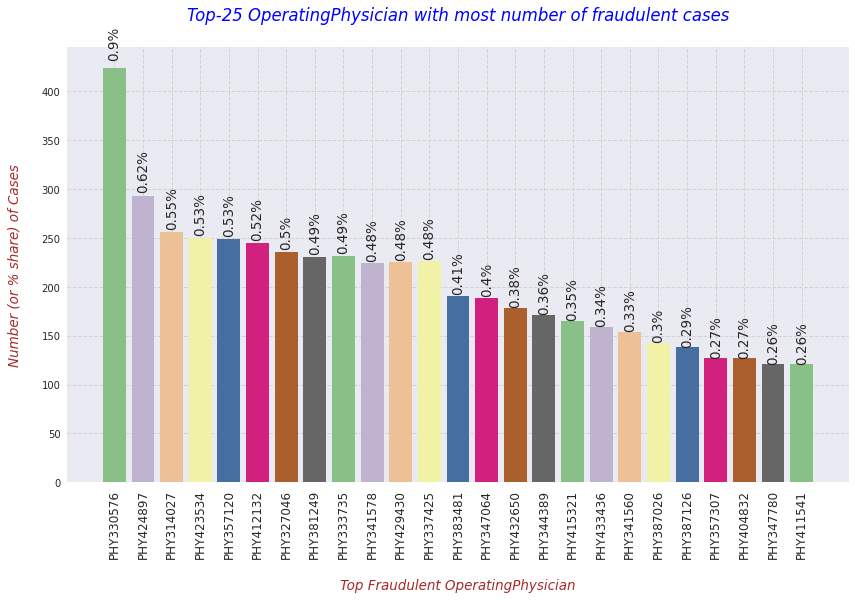

In [394]:
print(tmp_only_frauds[['OperatingPhysician','Num_of_cases','Percentage']].head(25), "\n")

with plt.style.context('seaborn'):
    plt.figure(figsize=(14,8))
    fig = sns.barplot(data=tmp_only_frauds.iloc[0:25], x="OperatingPhysician", y="Num_of_cases", palette='Accent')
    # Using the "patches" function we will get the location of the rectangle bars from the graph.
    ## Then by using those location(width & height) values we will add the annotations
    for p in fig.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        fig.annotate(f'{str(round((height*100)/tot_fraud_cases,2))+"%"}', (x + width/2, y + height*1.025), ha='center', fontsize=13.5, rotation=90)
    
    # Providing the labels and title to the graph
    plt.xlabel("\nTop Fraudulent OperatingPhysician", fontdict=label_font_dict)
    plt.xticks(rotation=90, fontsize=12)
    plt.ylabel("Number (or % share) of Cases\n", fontdict=label_font_dict)
    plt.minorticks_on()
    plt.grid(which='major', linestyle="--", color='lightgrey')
    plt.title("Top-25 OperatingPhysician with most number of fraudulent cases\n", fontdict=title_font_dict)
    plt.plot();

**`OBSERVATION`**
* The above plot shows us the Top-25 Operating Physicians with most percentage of Fraudulent Case Submissions.
    * Here, PHY330576 has the highest percentage share of fraudulent cases. But, the difference b/w other providers is not so high.

### **Q6. Which are the Top-25 `Operating Physicians` with maximum number of non-fraudulent cases?**

In [395]:
tmp_only_non_frauds = tmp[tmp['Fraud?'] == 'No'].sort_values(by=['Percentage'], ascending=False).reset_index(drop=True)

   OperatingPhysician  Num_of_cases  Percentage
0           PHY387900           180        0.27
1           PHY351121           179        0.27
2           PHY375943           147        0.22
3           PHY367255           132        0.20
4           PHY432614           129        0.19
5           PHY362889           122        0.18
6           PHY326984           121        0.18
7           PHY356444           108        0.16
8           PHY360179            98        0.15
9           PHY405720            96        0.14
10          PHY373032            97        0.14
11          PHY321493            88        0.13
12          PHY342223            89        0.13
13          PHY318242            85        0.13
14          PHY319973            89        0.13
15          PHY326049            81        0.12
16          PHY366914            79        0.12
17          PHY361063            84        0.12
18          PHY388040            82        0.12
19          PHY322775            71     

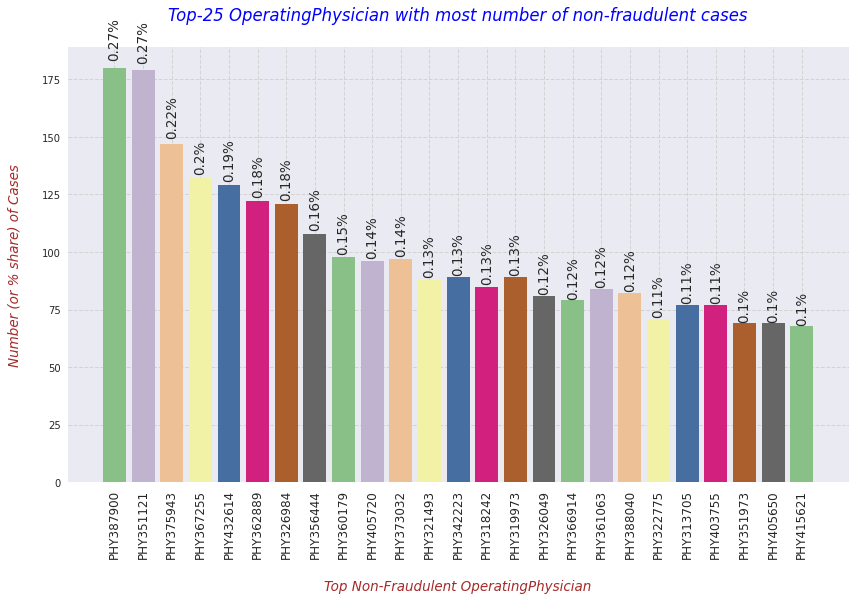

In [396]:
print(tmp_only_non_frauds[['OperatingPhysician','Num_of_cases','Percentage']].head(25), "\n")

with plt.style.context('seaborn'):
    plt.figure(figsize=(14,8))
    fig = sns.barplot(data=tmp_only_non_frauds.iloc[0:25], x="OperatingPhysician", y="Num_of_cases", palette='Accent')
    # Using the "patches" function we will get the location of the rectangle bars from the graph.
    ## Then by using those location(width & height) values we will add the annotations
    for p in fig.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        fig.annotate(f'{str(round((height*100)/tot_non_fraud_cases,2))+"%"}', (x + width/2, y + height*1.025), ha='center', fontsize=13.5, rotation=90)
    
    # Providing the labels and title to the graph
    plt.xlabel("\nTop Non-Fraudulent OperatingPhysician", fontdict=label_font_dict)
    plt.xticks(rotation=90, fontsize=12)
    plt.ylabel("Number (or % share) of Cases\n", fontdict=label_font_dict)
    plt.minorticks_on()
    plt.grid(which='major', linestyle="--", color='lightgrey')
    plt.title("Top-25 OperatingPhysician with most number of non-fraudulent cases\n", fontdict=title_font_dict)
    plt.plot();

**`OBSERVATION`**
* The above plot shows us the Top-25 Operating Physicians with most percentage of Non-Fraudulent Case Submissions.
    * Here, PHY387900 and PHY351121 has the highest percentage share of non-fraudulent cases. But, the difference b/w providers is not so high.

### **Q7. Which are the Top-25 `Other Physicians` with maximum number of fraudulent cases?**

In [397]:
tmp = pd.DataFrame(train_iobp_df.groupby(['OtherPhysician','PotentialFraud'])['BeneID'].count()).reset_index()
tmp.columns = ['OtherPhysician', 'Fraud?', 'Num_of_cases']
tot_fraud_cases = tmp[tmp['Fraud?'] == 'Yes']['Num_of_cases'].sum()
tot_non_fraud_cases = tmp[tmp['Fraud?'] == 'No']['Num_of_cases'].sum()
tmp['Cases'] = tmp['Fraud?'].apply(lambda val: tot_non_fraud_cases if val == "No" else tot_fraud_cases)
tmp['Percentage'] = round(((tmp['Num_of_cases'] / tmp['Cases']) * 100),2)

tmp.head()

,OtherPhysician,Fraud?,Num_of_cases,Cases,Percentage
0,PHY311001,No,1,125093,0.0
1,PHY311003,Yes,2,74643,0.0
2,PHY311005,No,2,125093,0.0
3,PHY311006,No,3,125093,0.0
4,PHY311007,Yes,1,74643,0.0


In [398]:
tmp_only_frauds = tmp[tmp['Fraud?'] == 'Yes'].sort_values(by=['Percentage'], ascending=False).reset_index(drop=True)

   OtherPhysician  Num_of_cases  Percentage
0       PHY412132          1247        1.67
1       PHY341578          1098        1.47
2       PHY338032          1070        1.43
3       PHY337425          1041        1.39
4       PHY347064           806        1.08
5       PHY322092           771        1.03
6       PHY409965           744        1.00
7       PHY313818           730        0.98
8       PHY350277           682        0.91
9       PHY415321           678        0.91
10      PHY313278           625        0.84
11      PHY359122           614        0.82
12      PHY416093           538        0.72
13      PHY333735           496        0.66
14      PHY421058           432        0.58
15      PHY359931           414        0.55
16      PHY396637           400        0.54
17      PHY327964           371        0.50
18      PHY336024           372        0.50
19      PHY315344           363        0.49
20      PHY410597           357        0.48
21      PHY416732           356 

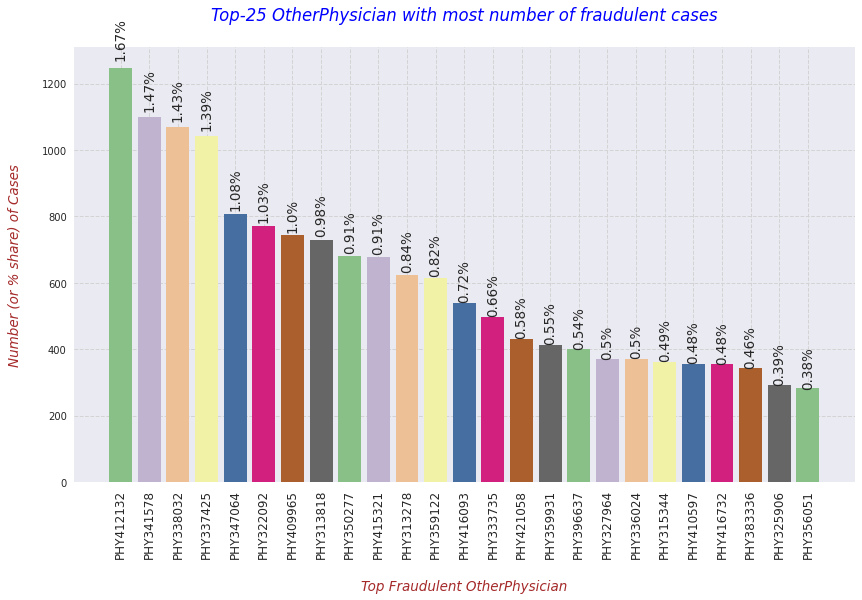

In [399]:
print(tmp_only_frauds[['OtherPhysician','Num_of_cases','Percentage']].head(25), "\n")

with plt.style.context('seaborn'):
    plt.figure(figsize=(14,8))
    fig = sns.barplot(data=tmp_only_frauds.iloc[0:25], x="OtherPhysician", y="Num_of_cases", palette='Accent')
    # Using the "patches" function we will get the location of the rectangle bars from the graph.
    ## Then by using those location(width & height) values we will add the annotations
    for p in fig.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        fig.annotate(f'{str(round((height*100)/tot_fraud_cases,2))+"%"}', (x + width/2, y + height*1.025), ha='center', fontsize=13.5, rotation=90)
    
    # Providing the labels and title to the graph
    plt.xlabel("\nTop Fraudulent OtherPhysician", fontdict=label_font_dict)
    plt.xticks(rotation=90, fontsize=12)
    plt.ylabel("Number (or % share) of Cases\n", fontdict=label_font_dict)
    plt.minorticks_on()
    plt.grid(which='major', linestyle="--", color='lightgrey')
    plt.title("Top-25 OtherPhysician with most number of fraudulent cases\n", fontdict=title_font_dict)
    plt.plot();

**`OBSERVATION`**
* The above plot shows us the Top-25 Other Physicians with most percentage of Fraudulent Case Submissions.
    * Here, PHY412132 has the highest percentage share of fraudulent cases. But, the difference with other providers is not so high.

### **Q8. Which are the Top-25 `Other Physicians` with maximum number of non-fraudulent cases?**

In [400]:
tmp_only_non_frauds = tmp[tmp['Fraud?'] == 'No'].sort_values(by=['Percentage'], ascending=False).reset_index(drop=True)

   OtherPhysician  Num_of_cases  Percentage
0       PHY422235           369        0.29
1       PHY387900           351        0.28
2       PHY375943           328        0.26
3       PHY411722           313        0.25
4       PHY363309           305        0.24
5       PHY331484           295        0.24
6       PHY362889           294        0.24
7       PHY326984           292        0.23
8       PHY367255           269        0.22
9       PHY389456           271        0.22
10      PHY356444           258        0.21
11      PHY382485           249        0.20
12      PHY315424           243        0.19
13      PHY405720           220        0.18
14      PHY354358           217        0.17
15      PHY323501           202        0.16
16      PHY403755           196        0.16
17      PHY384394           196        0.16
18      PHY388477           197        0.16
19      PHY395822           195        0.16
20      PHY326286           189        0.15
21      PHY415621           182 

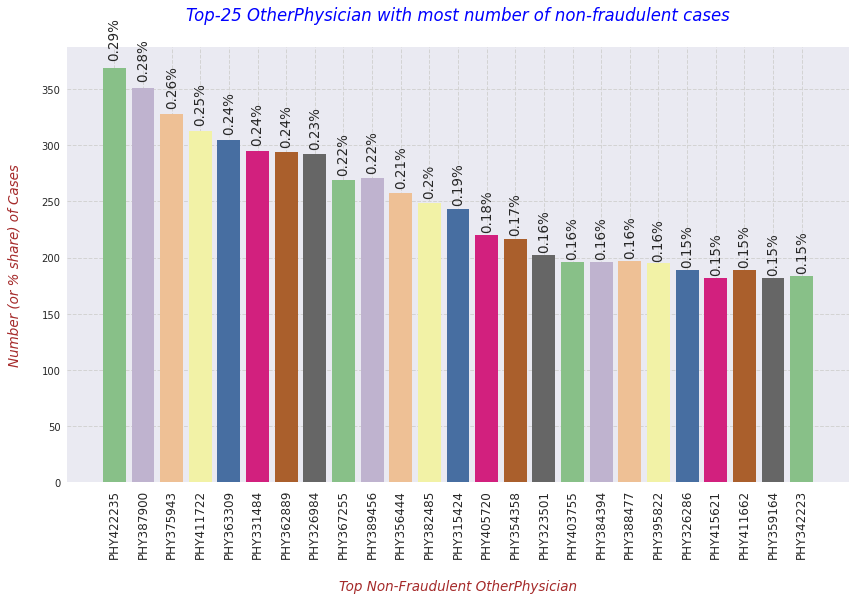

In [401]:
print(tmp_only_non_frauds[['OtherPhysician','Num_of_cases','Percentage']].head(25), "\n")

with plt.style.context('seaborn'):
    plt.figure(figsize=(14,8))
    fig = sns.barplot(data=tmp_only_non_frauds.iloc[0:25], x="OtherPhysician", y="Num_of_cases", palette='Accent')
    # Using the "patches" function we will get the location of the rectangle bars from the graph.
    ## Then by using those location(width & height) values we will add the annotations
    for p in fig.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        fig.annotate(f'{str(round((height*100)/tot_non_fraud_cases,2))+"%"}', (x + width/2, y + height*1.025), ha='center', fontsize=13.5, rotation=90)
    
    # Providing the labels and title to the graph
    plt.xlabel("\nTop Non-Fraudulent OtherPhysician", fontdict=label_font_dict)
    plt.xticks(rotation=90, fontsize=12)
    plt.ylabel("Number (or % share) of Cases\n", fontdict=label_font_dict)
    plt.minorticks_on()
    plt.grid(which='major', linestyle="--", color='lightgrey')
    plt.title("Top-25 OtherPhysician with most number of non-fraudulent cases\n", fontdict=title_font_dict)
    plt.plot();

**`OBSERVATION`**
* The above plot shows us the Top-25 Other Physicians with most percentage of Non-Fraudulent Case Submissions.
    * Here, PHY422235 has the highest percentage share of non-fraudulent cases. But, the difference with other providers is not so high.

### **Q9. Which are the Top-25 `ClmAdmitDiagnosisCode` with maximum number of fraudulent cases?**

In [402]:
tmp = pd.DataFrame(train_iobp_df.groupby(['ClmAdmitDiagnosisCode','PotentialFraud'])['BeneID'].count()).reset_index()
tmp.columns = ['ClmAdmitDiagnosisCode', 'Fraud?', 'Num_of_cases']
tot_fraud_cases = tmp[tmp['Fraud?'] == 'Yes']['Num_of_cases'].sum()
tot_non_fraud_cases = tmp[tmp['Fraud?'] == 'No']['Num_of_cases'].sum()
tmp['Cases'] = tmp['Fraud?'].apply(lambda val: tot_non_fraud_cases if val == "No" else tot_fraud_cases)
tmp['Percentage'] = round(((tmp['Num_of_cases'] / tmp['Cases']) * 100),2)

tmp.head()

,ClmAdmitDiagnosisCode,Fraud?,Num_of_cases,Cases,Percentage
0,0030,No,1,83850,0.00
1,0030,Yes,1,62049,0.00
2,0059,No,1,83850,0.00
3,0059,Yes,2,62049,0.00
4,00845,No,31,83850,0.04


In [403]:
tmp_only_frauds = tmp[tmp['Fraud?'] == 'Yes'].sort_values(by=['Percentage'], ascending=False).reset_index(drop=True)

   ClmAdmitDiagnosisCode  Num_of_cases  Percentage
0                  42731          1529        2.46
1                  V7612          1441        2.32
2                  78605          1432        2.31
3                  78650          1191        1.92
4                  78900          1020        1.64
5                   4019          1006        1.62
6                  25000           873        1.41
7                    486           843        1.36
8                  78079           828        1.33
9                   7802           793        1.28
10                  7295           740        1.19
11                  5990           703        1.13
12                 V5883           691        1.11
13                  4280           661        1.07
14                  7242           600        0.97
15                  7862           593        0.96
16                 V5789           573        0.92
17                 V5861           556        0.90
18                  2724       

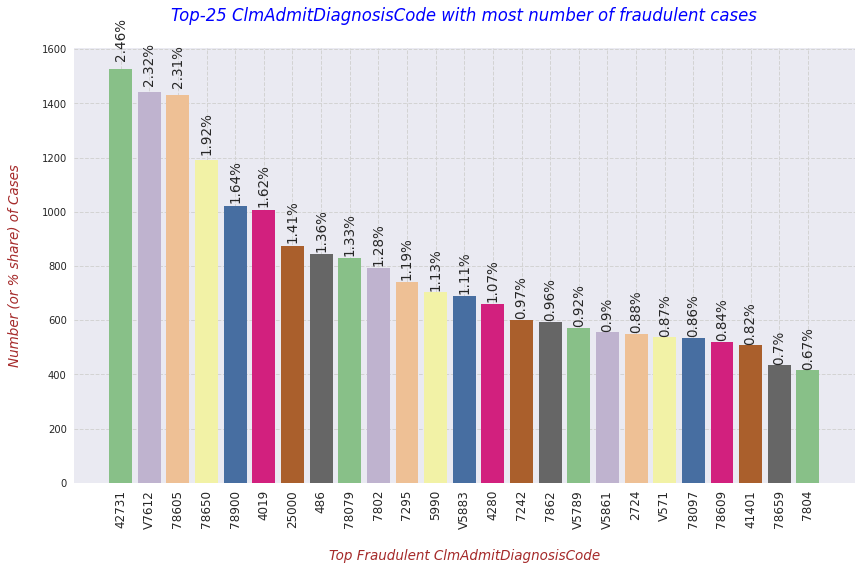

In [404]:
print(tmp_only_frauds[['ClmAdmitDiagnosisCode','Num_of_cases','Percentage']].head(25), "\n")

with plt.style.context('seaborn'):
    plt.figure(figsize=(14,8))
    fig = sns.barplot(data=tmp_only_frauds.iloc[0:25], x="ClmAdmitDiagnosisCode", y="Num_of_cases", palette='Accent')
    # Using the "patches" function we will get the location of the rectangle bars from the graph.
    ## Then by using those location(width & height) values we will add the annotations
    for p in fig.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        fig.annotate(f'{str(round((height*100)/tot_fraud_cases,2))+"%"}', (x + width/2, y + height*1.025), ha='center', fontsize=13.5, rotation=90)
    
    # Providing the labels and title to the graph
    plt.xlabel("\nTop Fraudulent ClmAdmitDiagnosisCode", fontdict=label_font_dict)
    plt.xticks(rotation=90, fontsize=12)
    plt.ylabel("Number (or % share) of Cases\n", fontdict=label_font_dict)
    plt.minorticks_on()
    plt.grid(which='major', linestyle="--", color='lightgrey')
    plt.title("Top-25 ClmAdmitDiagnosisCode with most number of fraudulent cases\n", fontdict=title_font_dict)
    plt.plot();

**`OBSERVATION`**
* The above plot shows us the Top-25 'Claim Admit Diagnosis Code' with most percentage of Fraudulent Case Submissions.

### **Q10. Which are the Top-25 `ClmAdmitDiagnosisCode` with maximum number of non-fraudulent cases?**

In [405]:
tmp_only_non_frauds = tmp[tmp['Fraud?'] == 'No'].sort_values(by=['Percentage'], ascending=False).reset_index(drop=True)

   ClmAdmitDiagnosisCode  Num_of_cases  Percentage
0                  V7612          2633        3.14
1                  42731          2105        2.51
2                   4019          1726        2.06
3                  78605          1560        1.86
4                  25000          1495        1.78
5                  78900          1316        1.57
6                  V5883          1182        1.41
7                   7295          1104        1.32
8                  78650          1082        1.29
9                   7242           997        1.19
10                 V5861           980        1.17
11                  2724           958        1.14
12                 78079           951        1.13
13                  5990           922        1.10
14                  V571           905        1.08
15                  7862           868        1.04
16                  7802           820        0.98
17                  4011           660        0.79
18                   486       

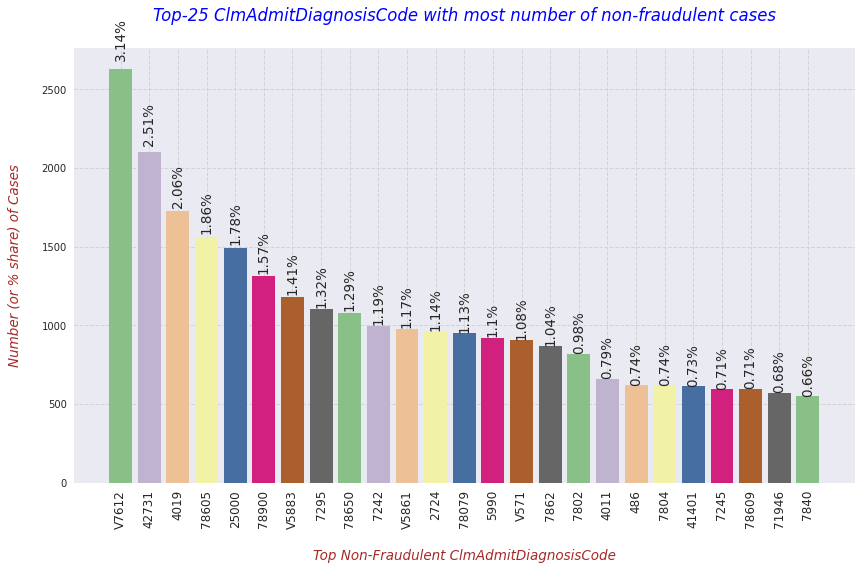

In [406]:
print(tmp_only_non_frauds[['ClmAdmitDiagnosisCode','Num_of_cases','Percentage']].head(25), "\n")

with plt.style.context('seaborn'):
    plt.figure(figsize=(14,8))
    fig = sns.barplot(data=tmp_only_non_frauds.iloc[0:25], x="ClmAdmitDiagnosisCode", y="Num_of_cases", palette='Accent')
    # Using the "patches" function we will get the location of the rectangle bars from the graph.
    ## Then by using those location(width & height) values we will add the annotations
    for p in fig.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        fig.annotate(f'{str(round((height*100)/tot_non_fraud_cases,2))+"%"}', (x + width/2, y + height*1.025), ha='center', fontsize=13.5, rotation=90)
    
    # Providing the labels and title to the graph
    plt.xlabel("\nTop Non-Fraudulent ClmAdmitDiagnosisCode", fontdict=label_font_dict)
    plt.xticks(rotation=90, fontsize=12)
    plt.ylabel("Number (or % share) of Cases\n", fontdict=label_font_dict)
    plt.minorticks_on()
    plt.grid(which='major', linestyle="--", color='lightgrey')
    plt.title("Top-25 ClmAdmitDiagnosisCode with most number of non-fraudulent cases\n", fontdict=title_font_dict)
    plt.plot();

**`OBSERVATION`**

* The above plot shows us the Top-25 'Claim Admit Diagnosis Code' with most percentage of Non-Fraudulent Case Submissions.

* Main observation from the above 2 plots is that same `Claim Admit Diagnostic Codes` have similar percentages for false and no-false claims. Therefore, it feels like this feature might not be very useful.

### **Q11. Which are the Top-25 `DiagnosisGroupCode` with maximum number of fraudulent cases?**

In [407]:
tmp = pd.DataFrame(train_iobp_df.groupby(['DiagnosisGroupCode','PotentialFraud'])['BeneID'].count()).reset_index()
tmp.columns = ['DiagnosisGroupCode', 'Fraud?', 'Num_of_cases']
tot_fraud_cases = tmp[tmp['Fraud?'] == 'Yes']['Num_of_cases'].sum()
tot_non_fraud_cases = tmp[tmp['Fraud?'] == 'No']['Num_of_cases'].sum()
tmp['Cases'] = tmp['Fraud?'].apply(lambda val: tot_non_fraud_cases if val == "No" else tot_fraud_cases)
tmp['Percentage'] = round(((tmp['Num_of_cases'] / tmp['Cases']) * 100),2)

tmp.head()

,DiagnosisGroupCode,Fraud?,Num_of_cases,Cases,Percentage
0,000,No,57,17072,0.33
1,000,Yes,77,23402,0.33
2,001,No,2,17072,0.01
3,001,Yes,8,23402,0.03
4,002,No,9,17072,0.05


In [408]:
tmp_only_frauds = tmp[tmp['Fraud?'] == 'Yes'].sort_values(by=['Percentage'], ascending=False).reset_index(drop=True)

   DiagnosisGroupCode  Num_of_cases  Percentage
0                 882           111        0.47
1                 166           107        0.46
2                 186           102        0.44
3                 192            98        0.42
4                 945            95        0.41
5                 884            97        0.41
6                 939            96        0.41
7                 202            95        0.41
8                 883            96        0.41
9                 188            97        0.41
10                168            94        0.40
11                949            94        0.40
12                204            94        0.40
13                885            92        0.39
14                876            90        0.38
15                196            89        0.38
16                198            89        0.38
17                183            89        0.38
18                887            90        0.38
19                950            90     

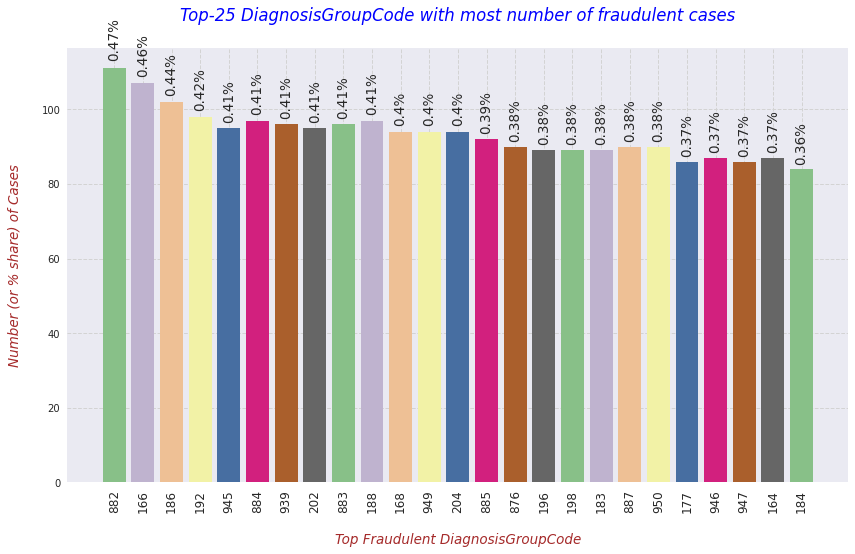

In [409]:
print(tmp_only_frauds[['DiagnosisGroupCode','Num_of_cases','Percentage']].head(25), "\n")

with plt.style.context('seaborn'):
    plt.figure(figsize=(14,8))
    fig = sns.barplot(data=tmp_only_frauds.iloc[0:25], x="DiagnosisGroupCode", y="Num_of_cases", palette='Accent')
    # Using the "patches" function we will get the location of the rectangle bars from the graph.
    ## Then by using those location(width & height) values we will add the annotations
    for p in fig.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        fig.annotate(f'{str(round((height*100)/tot_fraud_cases,2))+"%"}', (x + width/2, y + height*1.025), ha='center', fontsize=13.5, rotation=90)
    
    # Providing the labels and title to the graph
    plt.xlabel("\nTop Fraudulent DiagnosisGroupCode", fontdict=label_font_dict)
    plt.xticks(rotation=90, fontsize=12)
    plt.ylabel("Number (or % share) of Cases\n", fontdict=label_font_dict)
    plt.minorticks_on()
    plt.grid(which='major', linestyle="--", color='lightgrey')
    plt.title("Top-25 DiagnosisGroupCode with most number of fraudulent cases\n", fontdict=title_font_dict)
    plt.plot();

**`OBSERVATION`**
* The above plot shows us the Top-25 'Diagnosis Group Code' with most percentage of Fraudulent Case Submissions.

### **Q12. Which are the Top-25 `DiagnosisGroupCode` with maximum number of non-fraudulent cases?**

In [410]:
tmp_only_non_frauds = tmp[tmp['Fraud?'] == 'No'].sort_values(by=['Percentage'], ascending=False).reset_index(drop=True)

   DiagnosisGroupCode  Num_of_cases  Percentage
0                 183            76        0.45
1                 167            76        0.45
2                 884            77        0.45
3                 208            75        0.44
4                 940            70        0.41
5                 881            70        0.41
6                 882            68        0.40
7                 187            69        0.40
8                 887            69        0.40
9                 941            69        0.40
10                939            67        0.39
11                876            66        0.39
12                168            66        0.39
13                182            67        0.39
14                184            65        0.38
15                205            65        0.38
16                206            65        0.38
17                177            64        0.37
18                190            63        0.37
19                283            64     

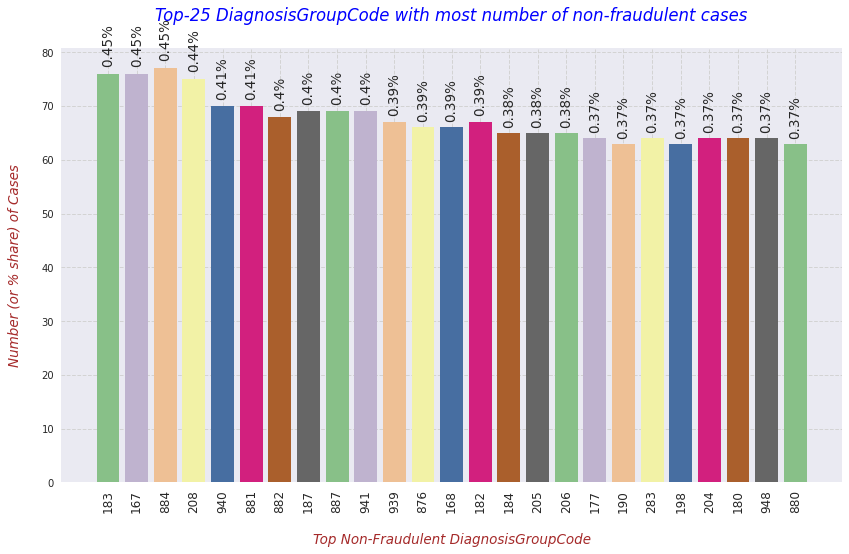

In [411]:
print(tmp_only_non_frauds[['DiagnosisGroupCode','Num_of_cases','Percentage']].head(25), "\n")

with plt.style.context('seaborn'):
    plt.figure(figsize=(14,8))
    fig = sns.barplot(data=tmp_only_non_frauds.iloc[0:25], x="DiagnosisGroupCode", y="Num_of_cases", palette='Accent')
    # Using the "patches" function we will get the location of the rectangle bars from the graph.
    ## Then by using those location(width & height) values we will add the annotations
    for p in fig.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        fig.annotate(f'{str(round((height*100)/tot_non_fraud_cases,2))+"%"}', (x + width/2, y + height*1.025), ha='center', fontsize=13.5, rotation=90)
    
    # Providing the labels and title to the graph
    plt.xlabel("\nTop Non-Fraudulent DiagnosisGroupCode", fontdict=label_font_dict)
    plt.xticks(rotation=90, fontsize=12)
    plt.ylabel("Number (or % share) of Cases\n", fontdict=label_font_dict)
    plt.minorticks_on()
    plt.grid(which='major', linestyle="--", color='lightgrey')
    plt.title("Top-25 DiagnosisGroupCode with most number of non-fraudulent cases\n", fontdict=title_font_dict)
    plt.plot();

**`OBSERVATION`**

* The above plot shows us the Top-25 'Diagnosis Group Code' with most percentage of Non-Fraudulent Case Submissions.

* Main observation from the above 2 plots is that same `Diagnosis Group Codes` have similar percentages for false and no-false claims. Therefore, it feels like this feature might not be very useful.

### **Q13. Does `Age_groups` have any relationship with maximum number of fraudulent cases?**

In [412]:
def bene_age_brackets(val):
    """
    Description : This function is created for allocating the age groups based on Beneficiary Age.
    """
    if val >=1 and val <=40:
        return 'Young'
    elif val > 40 and val <=60:
        return 'Mid'
    elif val > 60 and val <= 80:
        return 'Old'
    else:
        return 'Very Old'

In [413]:
train_iobp_df['AGE_groups'] = train_iobp_df['Bene_Age'].apply(lambda age: bene_age_brackets(age))

In [414]:
tmp = pd.DataFrame(train_iobp_df.groupby(['AGE_groups','PotentialFraud'])['BeneID'].count()).reset_index()
tmp.columns = ['AGE_groups', 'Fraud?', 'Num_of_cases']
tot_fraud_cases = tmp[tmp['Fraud?'] == 'Yes']['Num_of_cases'].sum()
tot_non_fraud_cases = tmp[tmp['Fraud?'] == 'No']['Num_of_cases'].sum()
tmp['Cases'] = tmp['Fraud?'].apply(lambda val: tot_non_fraud_cases if val == "No" else tot_fraud_cases)
tmp['Percentage'] = round(((tmp['Num_of_cases'] / tmp['Cases']) * 100),2)

tmp.head()

,AGE_groups,Fraud?,Num_of_cases,Cases,Percentage
0,Mid,No,35524,345415,10.28
1,Mid,Yes,21152,212796,9.94
2,Old,No,190334,345415,55.10
3,Old,Yes,116676,212796,54.83
4,Very Old,No,110885,345415,32.10


In [415]:
tmp_only_frauds = tmp[tmp['Fraud?'] == 'Yes'].sort_values(by=['Percentage'], ascending=False).reset_index(drop=True)

  AGE_groups  Num_of_cases  Percentage
0        Old        116676       54.83
1   Very Old         69780       32.79
2        Mid         21152        9.94
3      Young          5188        2.44 



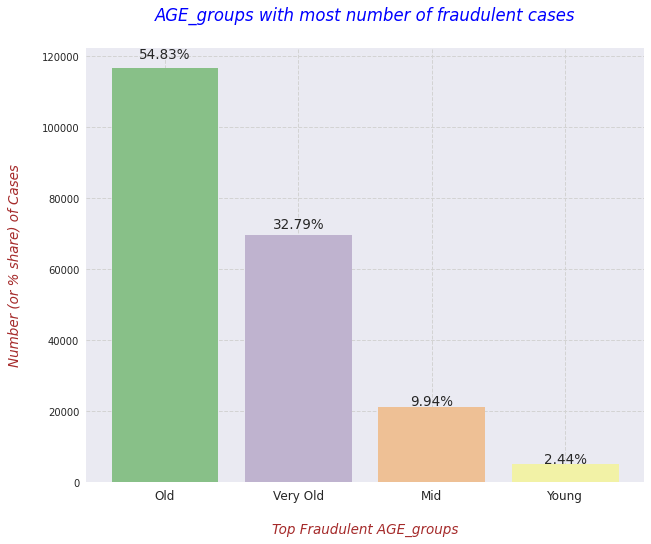

In [416]:
print(tmp_only_frauds[['AGE_groups','Num_of_cases','Percentage']].head(25), "\n")

with plt.style.context('seaborn'):
    plt.figure(figsize=(10,8))
    fig = sns.barplot(data=tmp_only_frauds, x="AGE_groups", y="Num_of_cases", palette='Accent')
    # Using the "patches" function we will get the location of the rectangle bars from the graph.
    ## Then by using those location(width & height) values we will add the annotations
    for p in fig.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        fig.annotate(f'{str(round((height*100)/tot_fraud_cases,2))+"%"}', (x + width/2, y + height*1.025), ha='center', fontsize=13.5, rotation=0)
    
    # Providing the labels and title to the graph
    plt.xlabel("\nTop Fraudulent AGE_groups", fontdict=label_font_dict)
    plt.xticks(rotation=0, fontsize=12)
    plt.ylabel("Number (or % share) of Cases\n", fontdict=label_font_dict)
    plt.minorticks_on()
    plt.grid(which='major', linestyle="--", color='lightgrey')
    plt.title("AGE_groups with most number of fraudulent cases\n", fontdict=title_font_dict)
    plt.plot();

**`OBSERVATION`**
* The above plot shows us the percentage of Fraudulent Case Submissions for various Age Groups.

### **Q14. Does `Age_groups` have any relationship with maximum number of non-fraudulent cases?**

In [417]:
tmp_only_non_frauds = tmp[tmp['Fraud?'] == 'No'].sort_values(by=['Percentage'], ascending=False).reset_index(drop=True)

  AGE_groups  Num_of_cases  Percentage
0        Old        190334       55.10
1   Very Old        110885       32.10
2        Mid         35524       10.28
3      Young          8672        2.51 



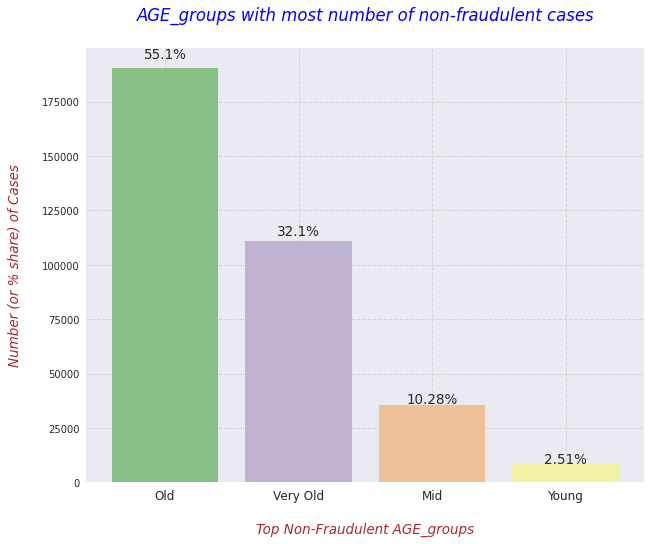

In [418]:
print(tmp_only_non_frauds[['AGE_groups','Num_of_cases','Percentage']].head(25), "\n")

with plt.style.context('seaborn'):
    plt.figure(figsize=(10,8))
    fig = sns.barplot(data=tmp_only_non_frauds, x="AGE_groups", y="Num_of_cases", palette='Accent')
    # Using the "patches" function we will get the location of the rectangle bars from the graph.
    ## Then by using those location(width & height) values we will add the annotations
    for p in fig.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        fig.annotate(f'{str(round((height*100)/tot_non_fraud_cases,2))+"%"}', (x + width/2, y + height*1.025), ha='center', fontsize=13.5, rotation=0)
    
    # Providing the labels and title to the graph
    plt.xlabel("\nTop Non-Fraudulent AGE_groups", fontdict=label_font_dict)
    plt.xticks(rotation=0, fontsize=12)
    plt.ylabel("Number (or % share) of Cases\n", fontdict=label_font_dict)
    plt.minorticks_on()
    plt.grid(which='major', linestyle="--", color='lightgrey')
    plt.title("AGE_groups with most number of non-fraudulent cases\n", fontdict=title_font_dict)
    plt.plot();

**`OBSERVATION`**

* The above plot shows us the percentage of Non-Fraudulent Case Submissions for various Age Groups.

* Main observation from the above 2 plots is that same `Age Groups` have similar percentages for false and no-false claims. Therefore, it feels like this feature might not be very useful.

### **Q15. Which are the Top-25 `States` with maximum number of fraudulent cases?**

In [419]:
tmp = pd.DataFrame(train_iobp_df.groupby(['State','PotentialFraud'])['BeneID'].count()).reset_index()
tmp.columns = ['State', 'Fraud?', 'Num_of_cases']
tot_fraud_cases = tmp[tmp['Fraud?'] == 'Yes']['Num_of_cases'].sum()
tot_non_fraud_cases = tmp[tmp['Fraud?'] == 'No']['Num_of_cases'].sum()
tmp['Cases'] = tmp['Fraud?'].apply(lambda val: tot_non_fraud_cases if val == "No" else tot_fraud_cases)
tmp['Percentage'] = round(((tmp['Num_of_cases'] / tmp['Cases']) * 100),2)

tmp.head()

,State,Fraud?,Num_of_cases,Cases,Percentage
0,1,No,6715,345415,1.94
1,1,Yes,3525,212796,1.66
2,2,No,531,345415,0.15
3,2,Yes,207,212796,0.10
4,3,No,7314,345415,2.12


In [420]:
tmp_only_frauds = tmp[tmp['Fraud?'] == 'Yes'].sort_values(by=['Percentage'], ascending=False).reset_index(drop=True)

    State  Num_of_cases  Percentage
0       5         30335       14.26
1      10         17512        8.23
2      33         17492        8.22
3      39         11448        5.38
4      45         10135        4.76
5      31          9112        4.28
6      49          8613        4.05
7      23          8538        4.01
8      14          8509        4.00
9      22          7798        3.66
10     44          6709        3.15
11     36          6381        3.00
12     26          5301        2.49
13     50          4782        2.25
14     15          4635        2.18
15     34          4385        2.06
16     11          4123        1.94
17      6          3666        1.72
18      1          3525        1.66
19     24          3453        1.62
20     42          3180        1.49
21     16          2733        1.28
22     21          2576        1.21
23     46          2124        1.00
24      3          2030        0.95 



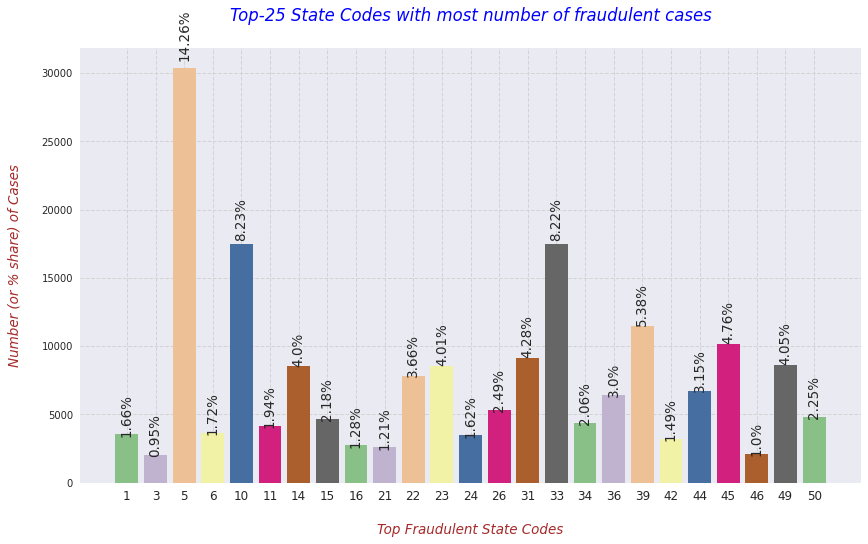

In [421]:
print(tmp_only_frauds[['State','Num_of_cases','Percentage']].head(25), "\n")

with plt.style.context('seaborn'):
    plt.figure(figsize=(14,8))
    fig = sns.barplot(data=tmp_only_frauds.iloc[0:25], x="State", y="Num_of_cases", palette='Accent')
    # Using the "patches" function we will get the location of the rectangle bars from the graph.
    ## Then by using those location(width & height) values we will add the annotations
    for p in fig.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        fig.annotate(f'{str(round((height*100)/tot_fraud_cases,2))+"%"}', (x + width/2, y + height*1.025), ha='center', fontsize=13.5, rotation=90)
    
    # Providing the labels and title to the graph
    plt.xlabel("\nTop Fraudulent State Codes", fontdict=label_font_dict)
    plt.xticks(rotation=0, fontsize=12)
    plt.ylabel("Number (or % share) of Cases\n", fontdict=label_font_dict)
    plt.minorticks_on()
    plt.grid(which='major', linestyle="--", color='lightgrey')
    plt.title("Top-25 State Codes with most number of fraudulent cases\n", fontdict=title_font_dict)
    plt.plot();

**`OBSERVATION`**
* The above plot shows us the Top-25 State Codes with most percentage of Fraudulent Case Submissions.

### **Q16. What are the Top-25 `States` with maximum number of non-fraudulent cases?**

In [422]:
tmp_only_non_frauds = tmp[tmp['Fraud?'] == 'No'].sort_values(by=['Percentage'], ascending=False).reset_index(drop=True)

    State  Num_of_cases  Percentage
0      45         23887        6.92
1      10         21561        6.24
2       5         21015        6.08
3      33         17532        5.08
4      14         15908        4.61
5      36         14910        4.32
6      34         14520        4.20
7      11         12880        3.73
8      39         12803        3.71
9      23         12805        3.71
10     15          9578        2.77
11     21          8685        2.51
12     18          8643        2.50
13     52          7839        2.27
14     44          7709        2.23
15     26          7610        2.20
16     42          7311        2.12
17      3          7314        2.12
18     50          6958        2.01
19     31          6828        1.98
20      1          6715        1.94
21     49          6384        1.85
22     19          6230        1.80
23     25          5863        1.70
24     22          5826        1.69 



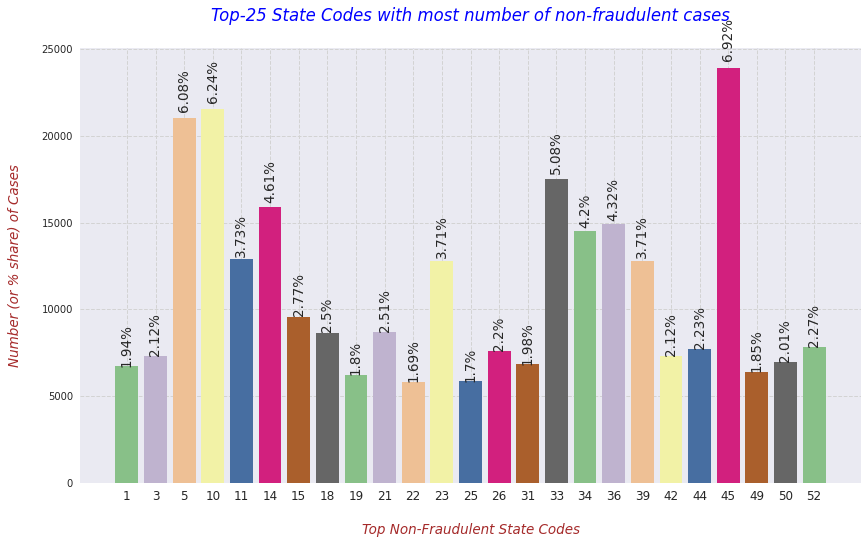

In [423]:
print(tmp_only_non_frauds[['State','Num_of_cases','Percentage']].head(25), "\n")

with plt.style.context('seaborn'):
    plt.figure(figsize=(14,8))
    fig = sns.barplot(data=tmp_only_non_frauds.iloc[0:25], x="State", y="Num_of_cases", palette='Accent')
    # Using the "patches" function we will get the location of the rectangle bars from the graph.
    ## Then by using those location(width & height) values we will add the annotations
    for p in fig.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        fig.annotate(f'{str(round((height*100)/tot_non_fraud_cases,2))+"%"}', (x + width/2, y + height*1.025), ha='center', fontsize=13.5, rotation=90)
    
    # Providing the labels and title to the graph
    plt.xlabel("\nTop Non-Fraudulent State Codes", fontdict=label_font_dict)
    plt.xticks(rotation=0, fontsize=12)
    plt.ylabel("Number (or % share) of Cases\n", fontdict=label_font_dict)
    plt.minorticks_on()
    plt.grid(which='major', linestyle="--", color='lightgrey')
    plt.title("Top-25 State Codes with most number of non-fraudulent cases\n", fontdict=title_font_dict)
    plt.plot();

**`OBSERVATION`**

* The above plot shows us the Top-25 State Codes with most percentage of Non-Fraudulent Case Submissions.

* Main observation from the above 2 plots is that same `State Codes` have similar percentages for false and no-false claims. Therefore, it feels like this feature might not be very useful.

### **Q17. Which are the Top-25 `Country` with maximum number of fraudulent cases?**

In [424]:
tmp = pd.DataFrame(train_iobp_df.groupby(['County','PotentialFraud'])['BeneID'].count()).reset_index()
tmp.columns = ['County', 'Fraud?', 'Num_of_cases']
tot_fraud_cases = tmp[tmp['Fraud?'] == 'Yes']['Num_of_cases'].sum()
tot_non_fraud_cases = tmp[tmp['Fraud?'] == 'No']['Num_of_cases'].sum()
tmp['Cases'] = tmp['Fraud?'].apply(lambda val: tot_non_fraud_cases if val == "No" else tot_fraud_cases)
tmp['Percentage'] = round(((tmp['Num_of_cases'] / tmp['Cases']) * 100),2)

tmp.head()

,County,Fraud?,Num_of_cases,Cases,Percentage
0,0,No,6584,345415,1.91
1,0,Yes,4897,212796,2.30
2,1,No,8,345415,0.00
3,1,Yes,4,212796,0.00
4,10,No,10750,345415,3.11


In [425]:
tmp_only_frauds = tmp[tmp['Fraud?'] == 'Yes'].sort_values(by=['Percentage'], ascending=False).reset_index(drop=True)

    County  Num_of_cases  Percentage
0      200         10078        4.74
1      470          7048        3.31
2      400          5962        2.80
3      590          5814        2.73
4        0          4897        2.30
5      160          4865        2.29
6      620          4704        2.21
7      130          4551        2.14
8      490          4477        2.10
9      170          4362        2.05
10     440          4314        2.03
11      20          4174        1.96
12      90          4079        1.92
13     150          3844        1.81
14     290          3725        1.75
15     510          3505        1.65
16     310          3437        1.62
17     390          3387        1.59
18     331          3284        1.54
19      10          3232        1.52
20     141          3202        1.50
21      60          3181        1.49
22     700          3020        1.42
23     250          2999        1.41
24     530          2871        1.35 



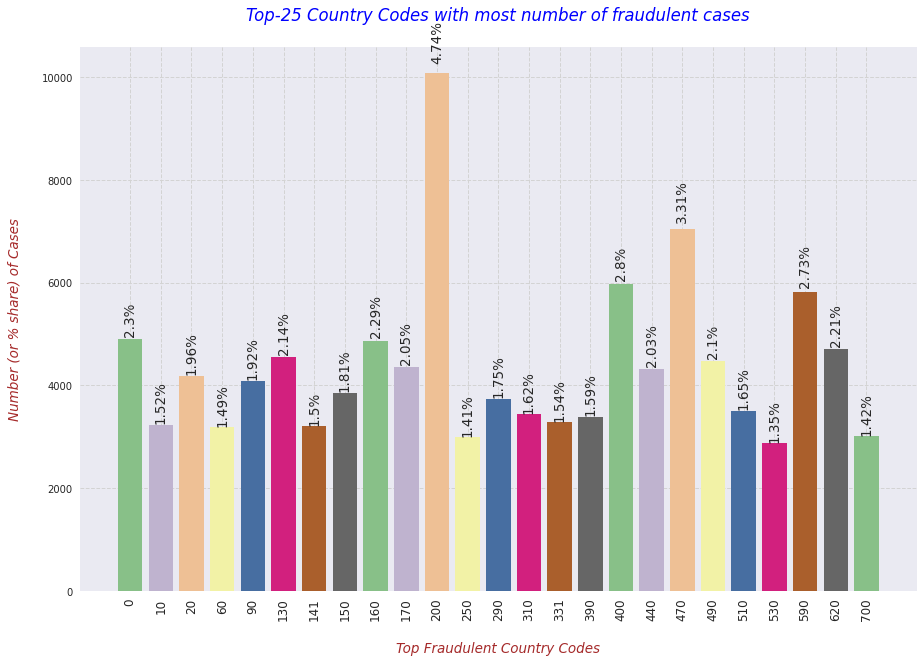

In [426]:
print(tmp_only_frauds[['County','Num_of_cases','Percentage']].head(25), "\n")

with plt.style.context('seaborn'):
    plt.figure(figsize=(15,10))
    fig = sns.barplot(data=tmp_only_frauds.iloc[0:25], x="County", y="Num_of_cases", palette='Accent')
    # Using the "patches" function we will get the location of the rectangle bars from the graph.
    ## Then by using those location(width & height) values we will add the annotations
    for p in fig.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        fig.annotate(f'{str(round((height*100)/tot_fraud_cases,2))+"%"}', (x + width/2, y + height*1.025), ha='center', fontsize=13.5, rotation=90)
    
    # Providing the labels and title to the graph
    plt.xlabel("\nTop Fraudulent Country Codes", fontdict=label_font_dict)
    plt.xticks(rotation=90, fontsize=12)
    plt.ylabel("Number (or % share) of Cases\n", fontdict=label_font_dict)
    plt.minorticks_on()
    plt.grid(which='major', linestyle="--", color='lightgrey')
    plt.title("Top-25 Country Codes with most number of fraudulent cases\n", fontdict=title_font_dict)
    plt.plot();

**`OBSERVATION`**
* The above plot shows us the Top-25 Country Codes with most percentage of Fraudulent Case Submissions.

### **Q18. What are the Top-25 `Country` with maximum number of non-fraudulent cases?**

In [427]:
tmp_only_non_frauds = tmp[tmp['Fraud?'] == 'No'].sort_values(by=['Percentage'], ascending=False).reset_index(drop=True)

    County  Num_of_cases  Percentage
0       10         10750        3.11
1       60          8814        2.55
2       20          8458        2.45
3       90          7007        2.03
4        0          6584        1.91
5      200          5879        1.70
6      150          5843        1.69
7      141          5793        1.68
8      400          5735        1.66
9      160          5668        1.64
10     310          5590        1.62
11      70          5487        1.59
12      50          5430        1.57
13     250          5385        1.56
14      40          5276        1.53
15     470          5230        1.51
16     480          5229        1.51
17     490          5010        1.45
18     100          4995        1.45
19     120          4936        1.43
20     240          4887        1.41
21     550          4513        1.31
22      30          4491        1.30
23     290          4417        1.28
24     390          4428        1.28 



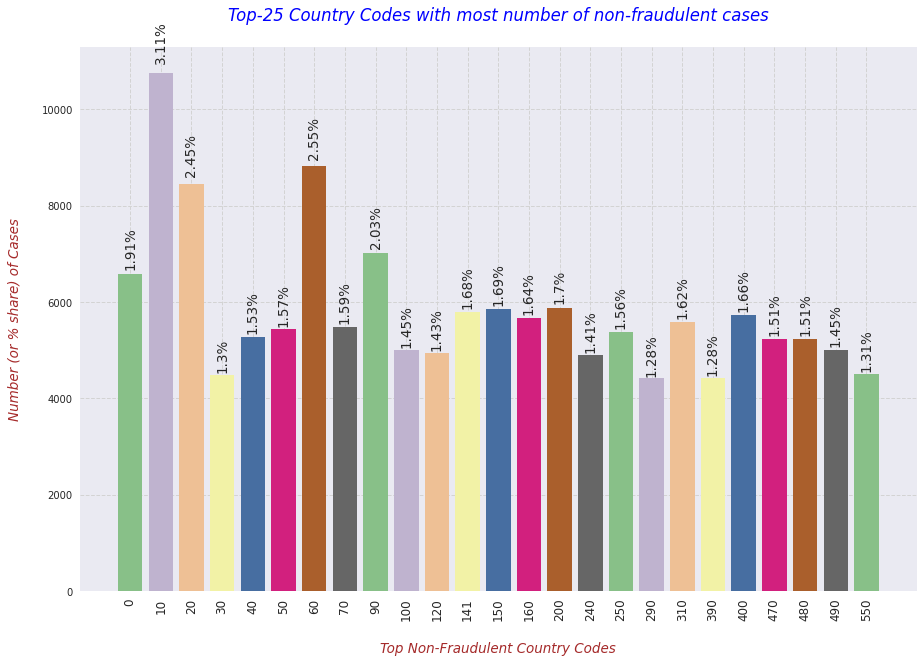

In [428]:
print(tmp_only_non_frauds[['County','Num_of_cases','Percentage']].head(25), "\n")

with plt.style.context('seaborn'):
    plt.figure(figsize=(15,10))
    fig = sns.barplot(data=tmp_only_non_frauds.iloc[0:25], x="County", y="Num_of_cases", palette='Accent')
    # Using the "patches" function we will get the location of the rectangle bars from the graph.
    ## Then by using those location(width & height) values we will add the annotations
    for p in fig.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        fig.annotate(f'{str(round((height*100)/tot_non_fraud_cases,2))+"%"}', (x + width/2, y + height*1.025), ha='center', fontsize=13.5, rotation=90)
    
    # Providing the labels and title to the graph
    plt.xlabel("\nTop Non-Fraudulent Country Codes", fontdict=label_font_dict)
    plt.xticks(rotation=90, fontsize=12)
    plt.ylabel("Number (or % share) of Cases\n", fontdict=label_font_dict)
    plt.minorticks_on()
    plt.grid(which='major', linestyle="--", color='lightgrey')
    plt.title("Top-25 Country Codes with most number of non-fraudulent cases\n", fontdict=title_font_dict)
    plt.plot();

**`OBSERVATION`**

* The above plot shows us the Top-25 Country Codes with most percentage of Non-Fraudulent Case Submissions.

* Main observation from the above 2 plots is that same `Country Codes` have similar percentages for false and no-false claims. Therefore, it feels like this feature might not be very useful.

### **Q19. Does various `Human Races` have any relationship with maximum number of fraudulent cases?**

In [429]:
tmp = pd.DataFrame(train_iobp_df.groupby(['Race','PotentialFraud'])['BeneID'].count()).reset_index()
tmp.columns = ['Race', 'Fraud?', 'Num_of_cases']
tot_fraud_cases = tmp[tmp['Fraud?'] == 'Yes']['Num_of_cases'].sum()
tot_non_fraud_cases = tmp[tmp['Fraud?'] == 'No']['Num_of_cases'].sum()
tmp['Cases'] = tmp['Fraud?'].apply(lambda val: tot_non_fraud_cases if val == "No" else tot_fraud_cases)
tmp['Percentage'] = round(((tmp['Num_of_cases'] / tmp['Cases']) * 100),2)

tmp.head()

,Race,Fraud?,Num_of_cases,Cases,Percentage
0,1,No,292691,345415,84.74
1,1,Yes,178345,212796,83.81
2,2,No,35356,345415,10.24
3,2,Yes,20284,212796,9.53
4,3,No,10753,345415,3.11


In [430]:
tmp_only_frauds = tmp[tmp['Fraud?'] == 'Yes'].sort_values(by=['Percentage'], ascending=False).reset_index(drop=True)

   Race  Num_of_cases  Percentage
0     1        178345       83.81
1     2         20284        9.53
2     3          8962        4.21
3     5          5205        2.45 



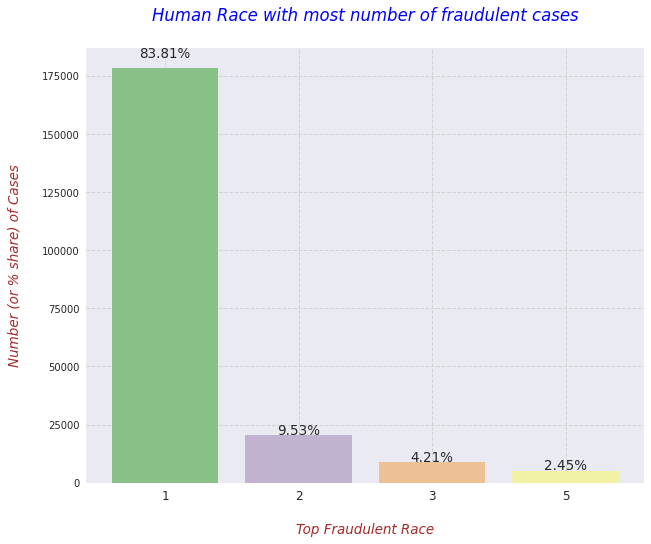

In [431]:
print(tmp_only_frauds[['Race','Num_of_cases','Percentage']].head(25), "\n")

with plt.style.context('seaborn'):
    plt.figure(figsize=(10,8))
    fig = sns.barplot(data=tmp_only_frauds, x="Race", y="Num_of_cases", palette='Accent')
    # Using the "patches" function we will get the location of the rectangle bars from the graph.
    ## Then by using those location(width & height) values we will add the annotations
    for p in fig.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        fig.annotate(f'{str(round((height*100)/tot_fraud_cases,2))+"%"}', (x + width/2, y + height*1.025), ha='center', fontsize=13.5, rotation=0)
    
    # Providing the labels and title to the graph
    plt.xlabel("\nTop Fraudulent Race", fontdict=label_font_dict)
    plt.xticks(rotation=0, fontsize=12)
    plt.ylabel("Number (or % share) of Cases\n", fontdict=label_font_dict)
    plt.minorticks_on()
    plt.grid(which='major', linestyle="--", color='lightgrey')
    plt.title("Human Race with most number of fraudulent cases\n", fontdict=title_font_dict)
    plt.plot();

**`OBSERVATION`**
* The above plot shows us the percentage of Fraudulent Case Submissions for various Human Races.

### **Q20. Does various `Human Races` have any relationship with maximum number of non-fraudulent cases?**

In [432]:
tmp_only_non_frauds = tmp[tmp['Fraud?'] == 'No'].sort_values(by=['Percentage'], ascending=False).reset_index(drop=True)

   Race  Num_of_cases  Percentage
0     1        292691       84.74
1     2         35356       10.24
2     3         10753        3.11
3     5          6615        1.92 



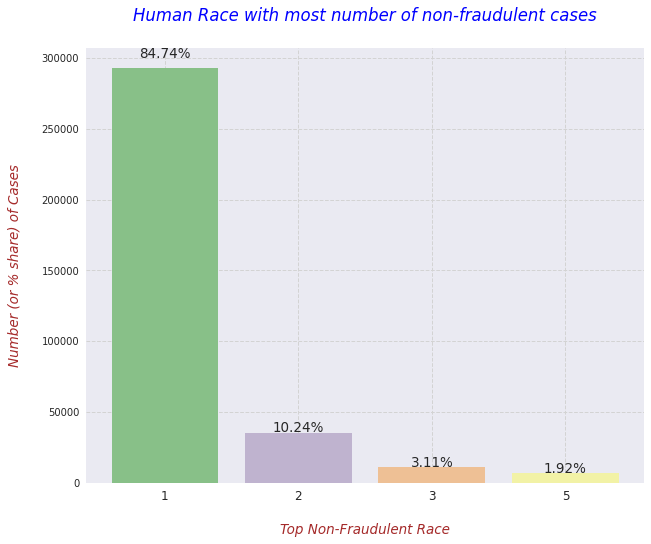

In [433]:
print(tmp_only_non_frauds[['Race','Num_of_cases','Percentage']].head(25), "\n")

with plt.style.context('seaborn'):
    plt.figure(figsize=(10,8))
    fig = sns.barplot(data=tmp_only_non_frauds, x="Race", y="Num_of_cases", palette='Accent')
    # Using the "patches" function we will get the location of the rectangle bars from the graph.
    ## Then by using those location(width & height) values we will add the annotations
    for p in fig.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        fig.annotate(f'{str(round((height*100)/tot_non_fraud_cases,2))+"%"}', (x + width/2, y + height*1.025), ha='center', fontsize=13.5, rotation=0)
    
    # Providing the labels and title to the graph
    plt.xlabel("\nTop Non-Fraudulent Race", fontdict=label_font_dict)
    plt.xticks(rotation=0, fontsize=12)
    plt.ylabel("Number (or % share) of Cases\n", fontdict=label_font_dict)
    plt.minorticks_on()
    plt.grid(which='major', linestyle="--", color='lightgrey')
    plt.title("Human Race with most number of non-fraudulent cases\n", fontdict=title_font_dict)
    plt.plot();

**`OBSERVATION`**

* The above plot shows us the percentage of Non-Fraudulent Case Submissions for various Human Races.

* Main observation from the above 2 plots is that same `Human Races` have similar percentages for false and no-false claims. Therefore, it feels like this feature might not be very useful.

## ***Exploring_Target_Labels_Data***

In [436]:
train_tgt_lbls_df.head()

,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes
2,PRV51004,No
3,PRV51005,Yes
4,PRV51007,No


* **Check the Fraud and Non-Fraud Counts**

In [437]:
print("### The unique number of providers are {}. ###".format(train_tgt_lbls_df.shape[0]))

### The unique number of providers are 5410. ###


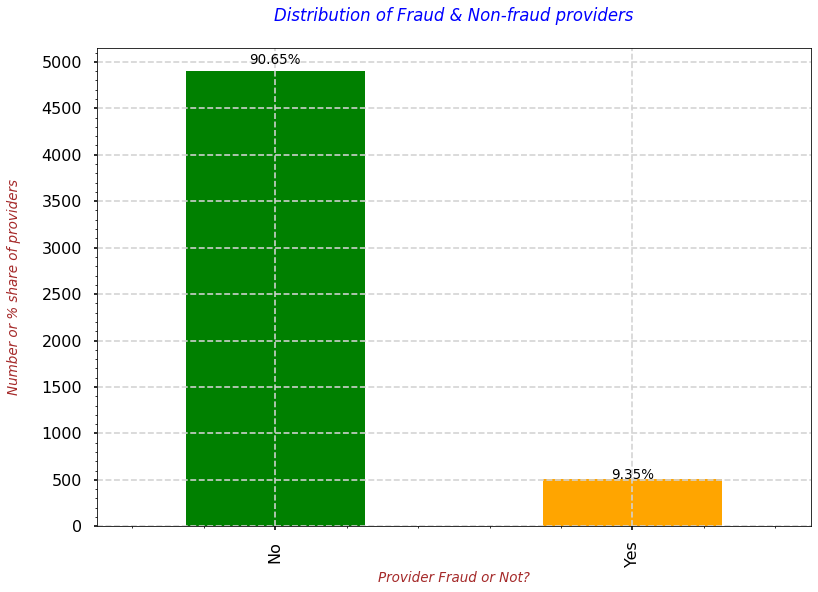

In [438]:
with plt.style.context('seaborn-poster'):
    fig = train_tgt_lbls_df["PotentialFraud"].value_counts().plot(kind='bar', color=['green','orange'])
    # Using the "patches" function we will get the location of the rectangle bars from the graph.
    ## Then by using those location(width & height) values we will add the annotations
    for p in fig.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        fig.annotate(f'{str(round((height*100)/train_tgt_lbls_df.shape[0],2))+"%"}', (x + width/2, y + height*1.015), ha='center', fontsize=13.5)
    # Providing the labels and title to the graph
    plt.xlabel("Provider Fraud or Not?", fontdict=label_font_dict)
    plt.ylabel("Number or % share of providers\n", fontdict=label_font_dict)
    plt.yticks(np.arange(0,5100,500))
    plt.grid(which='major', linestyle="--", color='lightgrey')
    plt.minorticks_on()
    plt.title("Distribution of Fraud & Non-fraud providers\n", fontdict=title_font_dict)
    plt.plot();

**`OBSERVATION`**
* From the above plot, we can say that 90% of the providers are not frausters and only 9% of them are involved in frauds.

### **Adding `New Feature - 1` :: `Admitted` or `Not Admitted` indicator in IP and OP Dataset**

* **Adding in IP Dataset**

In [439]:
train_ip_df["Admitted?"] = 1

In [440]:
train_ip_df.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,...,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,Admitted?
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,...,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,6186,1068.0,2009-09-02,750,6186,...,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN,1
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,29590,1068.0,2009-09-20,883,29623,...,71690,34590,V1581,32723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,431,1068.0,2009-02-22,067,43491,...,7843,32723,V1041,4254,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN,1
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,78321,1068.0,2009-08-30,975,042,...,34400,5856,42732,486,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN,1


* **Adding in OP Dataset**

In [441]:
train_op_df["Admitted?"] = 0

In [442]:
train_op_df.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode,Admitted?
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,V5866,V1272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409,0
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380,0
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,30000,72887,4280,7197,V4577,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947,0


### **Merging the Datasets**

In [443]:
# Commom columns must be 28
common_cols = [col for col in train_ip_df.columns if col in train_op_df.columns]
len(common_cols)

28

In [444]:
# Merging the IP and OP dataset on the basis of common columns
train_ip_op_df = pd.merge(left=train_ip_df, right=train_op_df, left_on=common_cols, right_on=common_cols, how="outer")
train_ip_op_df.shape

(558211, 31)

In [445]:
train_ip_op_df.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,...,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,Admitted?
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,...,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,6186,1068.0,2009-09-02,750,6186,...,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN,1
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,29590,1068.0,2009-09-20,883,29623,...,71690,34590,V1581,32723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,431,1068.0,2009-02-22,067,43491,...,7843,32723,V1041,4254,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN,1
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,78321,1068.0,2009-08-30,975,042,...,34400,5856,42732,486,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN,1


### **Merging the IP_OP Dataset with BENE Data**

In [446]:
# Joining the IP_OP dataset with the BENE data
train_ip_op_bene_df = pd.merge(left=train_ip_op_df, right=train_bene_df, left_on='BeneID', right_on='BeneID',how='inner')
train_ip_op_bene_df.shape

(558211, 55)

### **Merging the IP_OP_BENE Dataset with PROVIDER level Tgt Labels Data**

In [447]:
# Joining the IP_OP_BENE dataset with the Tgt Label Provider Data
train_iobp_df = pd.merge(left=train_ip_op_bene_df, right=train_tgt_lbls_df, left_on='Provider', right_on='Provider',how='inner')
train_iobp_df.shape

(558211, 56)

### **Entire Dataset**

In [448]:
train_iobp_df.shape

(558211, 56)

In [449]:
# Unique Providers
train_iobp_df["Provider"].nunique()

5410

In [450]:
# Unique Claim numbers
train_iobp_df["ClaimID"].nunique()

558211

In [451]:
# Joining with the PRV Tgt Labels
prvs_claims_df = pd.DataFrame(train_iobp_df.groupby(['Provider'])['ClaimID'].count()).reset_index()
prvs_claims_tgt_lbls_df = pd.merge(left=prvs_claims_df, right=train_tgt_lbls_df, on='Provider', how='inner')
prvs_claims_tgt_lbls_df

,Provider,ClaimID,PotentialFraud
0,PRV51001,25,No
1,PRV51003,132,Yes
2,PRV51004,149,No
3,PRV51005,1165,Yes
4,PRV51007,72,No
...,...,...,...
5405,PRV57759,28,No
5406,PRV57760,22,No
5407,PRV57761,82,No
5408,PRV57762,1,No


- **Fraud Count at Claims level**

     PotentialFraud
No           345415
Yes          212796 



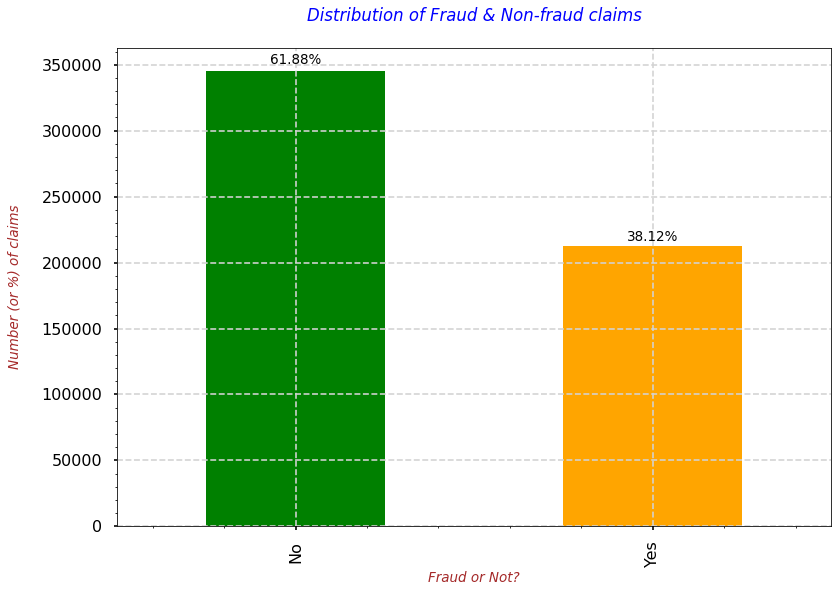

In [452]:
print(pd.DataFrame(train_iobp_df['PotentialFraud'].value_counts()), "\n")

with plt.style.context('seaborn-poster'):
    fig = train_iobp_df['PotentialFraud'].value_counts().plot(kind='bar', color=['green','orange'])
    # Using the "patches" function we will get the location of the rectangle bars from the graph.
    ## Then by using those location(width & height) values we will add the annotations
    for p in fig.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        fig.annotate(f'{str(round((height*100)/train_iobp_df.shape[0],2))+"%"}', (x + width/2, y + height*1.015), ha='center', fontsize=13.5)
    # Providing the labels and title to the graph
    plt.xlabel("Fraud or Not?", fontdict=label_font_dict)
    plt.ylabel("Number (or %) of claims\n", fontdict=label_font_dict)
    plt.grid(which='major', linestyle="--", color='lightgrey')
    plt.minorticks_on()
    plt.title("Distribution of Fraud & Non-fraud claims\n", fontdict=title_font_dict)
    plt.plot();

**`OBSERVATION`**
* The above plot shows us that, 62% of claims are Non-Fraud and 32% of them are Fraudulent. 
    * By looking at the percentages we may say that there is a class-imbalance problem but after looking at the number of records it doesn't seem to be a severe class-imbalance problem. 
        * So, I'll try some class balancing techniques only after training a baseline model w/o any synthetic or class weighting techniques.

## **Feature Engineering**
**`Let's create some features`**

### **Adding `New Feature - 2` :: `Is_Alive?`**

    - Is Alive? = No if DOD is NaN else Yes

In [453]:
train_iobp_df['DOB'] = pd.to_datetime(train_iobp_df['DOB'], format="%Y-%m-%d")
train_iobp_df['DOD'] = pd.to_datetime(train_iobp_df['DOD'], format="%Y-%m-%d")

In [454]:
train_iobp_df['Is_Alive?'] = train_iobp_df['DOD'].apply(lambda val: 'No' if val != val else 'Yes')

In [455]:
train_iobp_df['Is_Alive?'].value_counts()

No     554080
Yes      4131
Name: Is_Alive?, dtype: int64

### **Adding `New Feature - 3` :: `Claim_Duration`**
    
    - Claim Duration = Claim End Date - Claim Start Date

In [456]:
train_iobp_df['ClaimStartDt'] = pd.to_datetime(train_iobp_df['ClaimStartDt'], format="%Y-%m-%d")
train_iobp_df['ClaimEndDt'] = pd.to_datetime(train_iobp_df['ClaimEndDt'], format="%Y-%m-%d")

train_iobp_df['Claim_Duration'] = (train_iobp_df['ClaimEndDt'] - train_iobp_df['ClaimStartDt']).dt.days

### **Adding `New Feature - 4` :: `Admitted_Duration`**

    - Admitted Duration = Discharge Date - Admission Date

In [457]:
train_iobp_df['AdmissionDt'] = pd.to_datetime(train_iobp_df['AdmissionDt'], format="%Y-%m-%d")
train_iobp_df['DischargeDt'] = pd.to_datetime(train_iobp_df['DischargeDt'], format="%Y-%m-%d")

train_iobp_df['Admitted_Duration'] = (train_iobp_df['DischargeDt'] - train_iobp_df['AdmissionDt']).dt.days

### **Adding `New Feature - 5` :: `Bene_Age`**

    - Bene Age = DOD - DOB (if DOD is Null then replace it with MAX date in DOD)

In [458]:
# Filling the Null values as MAX Date of Death in the Dataset
train_iobp_df['DOD'].fillna(value=train_iobp_df['DOD'].max(), inplace=True)

In [459]:
train_iobp_df['Bene_Age'] = round(((train_iobp_df['DOD'] - train_iobp_df['DOB']).dt.days)/365,1)

In [503]:
train_iobp_df.shape

(558211, 327)

In [504]:
# Removing unwanted columns
remove_unwanted_columns=['BeneID', 'ClaimID', 'ClaimStartDt','ClaimEndDt','AttendingPhysician','OperatingPhysician', 'OtherPhysician',
                      'AdmissionDt', 'ClmAdmitDiagnosisCode', 'DischargeDt', 'DiagnosisGroupCode',
                      'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 
                      'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10',
                      'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3', 'DOB', 'DOD', 'State', 'County']

train_iobp_df.drop(columns=remove_unwanted_columns, axis=1, inplace=True)

In [505]:
train_iobp_df.shape

(558211, 299)

In [506]:
# Filling Nulls in Deductible Amt Paid by Patient
train_iobp_df['DeductibleAmtPaid'].fillna(value=0, inplace=True)

In [507]:
# Binary encoding the categorical features --> 0 means No and 1 means Yes
train_iobp_df['Gender'] = train_iobp_df['Gender'].apply(lambda val: 0 if val == 2 else val)
train_iobp_df['PotentialFraud'] = train_iobp_df['PotentialFraud'].apply(lambda val: 0 if val == "No" else 1)
train_iobp_df['Is_Alive?'] = train_iobp_df['Is_Alive?'].apply(lambda val: 0 if val == "No" else 1)

train_iobp_df['ChronicCond_Alzheimer'] = train_iobp_df['ChronicCond_Alzheimer'].apply(lambda val: 0 if val == 2 else val)
train_iobp_df['ChronicCond_Heartfailure'] = train_iobp_df['ChronicCond_Heartfailure'].apply(lambda val: 0 if val == 2 else val)
train_iobp_df['ChronicCond_KidneyDisease'] = train_iobp_df['ChronicCond_KidneyDisease'].apply(lambda val: 0 if val == 2 else val)
train_iobp_df['ChronicCond_Cancer'] = train_iobp_df['ChronicCond_Cancer'].apply(lambda val: 0 if val == 2 else val)
train_iobp_df['ChronicCond_ObstrPulmonary'] = train_iobp_df['ChronicCond_ObstrPulmonary'].apply(lambda val: 0 if val == 2 else val)
train_iobp_df['ChronicCond_Depression'] = train_iobp_df['ChronicCond_Depression'].apply(lambda val: 0 if val == 2 else val)
train_iobp_df['ChronicCond_Diabetes'] = train_iobp_df['ChronicCond_Diabetes'].apply(lambda val: 0 if val == 2 else val)
train_iobp_df['ChronicCond_IschemicHeart'] = train_iobp_df['ChronicCond_IschemicHeart'].apply(lambda val: 0 if val == 2 else val)
train_iobp_df['ChronicCond_Osteoporasis'] = train_iobp_df['ChronicCond_Osteoporasis'].apply(lambda val: 0 if val == 2 else val)
train_iobp_df['ChronicCond_rheumatoidarthritis'] = train_iobp_df['ChronicCond_rheumatoidarthritis'].apply(lambda val: 0 if val == 2 else val)
train_iobp_df['ChronicCond_stroke'] = train_iobp_df['ChronicCond_stroke'].apply(lambda val: 0 if val == 2 else val)

In [508]:
# Encoding the Categorical features
train_iobp_df = pd.get_dummies(train_iobp_df,columns=['Gender', 'Race', 'Admitted?', 'Is_Alive?'], drop_first=True)

In [511]:
# Filling Nulls in the aggregated features
train_iobp_df.fillna(value=0, inplace=True)

In [513]:
# Checking the Datatypes of the features
train_iobp_df.dtypes

Provider                                                            object
InscClaimAmtReimbursed                                               int64
DeductibleAmtPaid                                                  float64
RenalDiseaseIndicator                                                int64
ChronicCond_Alzheimer                                                int64
ChronicCond_Heartfailure                                             int64
ChronicCond_KidneyDisease                                            int64
ChronicCond_Cancer                                                   int64
ChronicCond_ObstrPulmonary                                           int64
ChronicCond_Depression                                               int64
ChronicCond_Diabetes                                                 int64
ChronicCond_IschemicHeart                                            int64
ChronicCond_Osteoporasis                                             int64
ChronicCond_rheumatoidart

## **Entire Data `Aggregation` :: At provider level**

   * **`Reasoning`** :: The main objective is to predict the `Medicare Provider Fraud`. Thus, here we are grouping the entire dataset at the level of PROVIDER and taking SUM of all the columns to create n-dimensional representation of each provider.

In [514]:
train_iobp_df = train_iobp_df.groupby(['Provider','PotentialFraud'],as_index=False).agg('sum')

In [515]:
train_iobp_df.shape

(5410, 301)

# **`Data Seggregation`**

## **Creating separate sets of independent features and target column.**

   * **`Reasoning`** :: These sets will be used for training the ML Models.

In [516]:
X = train_iobp_df.drop(axis=1, columns=['Provider','PotentialFraud'])
y = train_iobp_df['PotentialFraud']

In [517]:
X.shape, type(X), y.shape, type(y)

((5410, 299), pandas.core.frame.DataFrame, (5410,), pandas.core.series.Series)

In [518]:
X.head()

,InscClaimAmtReimbursed,DeductibleAmtPaid,RenalDiseaseIndicator,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,...,ClmCount_Provider_BeneID_ClmDiagnosisCode_8_ClmProcedureCode_1,ClmCount_Provider_BeneID_ClmDiagnosisCode_8_ClmProcedureCode_2,ClmCount_Provider_BeneID_ClmDiagnosisCode_8_ClmProcedureCode_3,ClmCount_Provider_BeneID_ClmDiagnosisCode_9_ClmProcedureCode_1,ClmCount_Provider_BeneID_ClmDiagnosisCode_9_ClmProcedureCode_2,ClmCount_Provider_BeneID_ClmDiagnosisCode_9_ClmProcedureCode_3,ClmCount_Provider_BeneID_ClmDiagnosisCode_10_ClmProcedureCode_1,ClmCount_Provider_BeneID_ClmDiagnosisCode_10_ClmProcedureCode_2,ClmCount_Provider_BeneID_ClmDiagnosisCode_10_ClmProcedureCode_3,Gender_1,Race_2,Race_3,Race_5,Admitted?_1,Is_Alive?_1
0,104640,5340.0,8,15,19,17,5,10,9,21,23,6,8,6,440150,...,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,9.0,4.0,0.0,0.0,5.0,0.0
1,605670,66286.0,29,56,80,64,10,41,54,100,112,33,38,12,999000,...,31.0,7.0,0.0,28.0,7.0,0.0,3.0,1.0,0.0,54.0,24.0,0.0,1.0,62.0,1.0
2,52170,310.0,23,64,88,50,16,41,63,105,108,49,46,17,648430,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46.0,24.0,5.0,0.0,0.0,1.0
3,280910,3700.0,259,426,680,507,165,295,485,799,895,344,331,124,4221950,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,511.0,262.0,10.0,0.0,0.0,4.0
4,33710,3264.0,11,26,40,22,12,16,29,49,51,21,22,12,219600,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34.0,14.0,0.0,0.0,3.0,1.0


In [519]:
y.head()

0    0
1    1
2    0
3    1
4    0
Name: PotentialFraud, dtype: int64

## **`Train Test Split` :: Creating TRAIN and VALIDATION sets.**

   * **`Reasoning`** :: These sets will be used for measurng the performance of ML Models.

In [521]:
from sklearn.model_selection import train_test_split as tts

In [522]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.20, stratify=y, random_state=39)

In [523]:
# Checking shape of each set
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4328, 299), (1082, 299), (4328,), (1082,))

In [524]:
# Checking count of tgt labels in y_train
y_train.value_counts()

0    3923
1     405
Name: PotentialFraud, dtype: int64

In [525]:
# Checking count of tgt labels in y_test
y_test.value_counts()

0    981
1    101
Name: PotentialFraud, dtype: int64

# **`Standardizing TRAIN & TEST sets`** 
## **Bringing every feature into the same scale.**

In [526]:
from sklearn.preprocessing import RobustScaler

In [527]:
# Standardize the data (train and test)
robust_scaler = RobustScaler()
robust_scaler.fit(X_train)
X_train_std = robust_scaler.transform(X_train)
X_test_std = robust_scaler.transform(X_test)

# Baseline Model Training

### **`Using Class Weighting Scheme`**

#### **`1. Logistic Regression`**

In [528]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.calibration import CalibratedClassifierCV

In [529]:
# Training the model with all features and hyper-parameterized values
log_reg_1 = LogisticRegression(C=0.0316228, penalty='l1',
                               fit_intercept=True, solver='liblinear', tol=0.0001, max_iter=500, 
                               class_weight='balanced',
                               verbose=0, 
                               intercept_scaling=1.0,
                               multi_class='auto',
                               random_state=49)

log_reg_1.fit(X_train_std, y_train)

LogisticRegression(C=0.0316228, class_weight='balanced', intercept_scaling=1.0,
                   max_iter=500, penalty='l1', random_state=49,
                   solver='liblinear')

In [530]:
def pred_prob(clf, data): 
    """
    Description :: This function is created for storing the predicted probabability using the trained model.
    
    Input :: It accepts below input parameters :
      - clf : Trained model classifier
      - data : Dataset for which we want to generate the predictions
    """
    y_pred = clf.predict_proba(data)[:,1]
    return y_pred

def draw_roc(train_fpr, train_tpr, test_fpr, test_tpr):
    """
    Description :: This function is created for calculating the AUC score on train and test data. And, plotting the ROC curve.
    
    Input :: It accepts below input parameters :
      - train_fpr : Train False +ve rate
      - train_tpr : Train True +ve rate
      - test_fpr : Test False +ve rate
      - test_tpr : Test True +ve rate
    """
    # calculate auc for train and test
    train_auc = auc(train_fpr, train_tpr)
    test_auc = auc(test_fpr, test_tpr)
    with plt.style.context('seaborn-poster'):
      plt.plot(train_fpr, train_tpr, label="Train AUC ="+"{:.4f}".format(train_auc), color='blue')
      plt.plot(test_fpr, test_tpr, label="Test AUC ="+"{:.4f}".format(test_auc), color='red')
      plt.legend()
      plt.xlabel("False Positive Rate(FPR)", fontdict=label_font_dict)
      plt.ylabel("True Positive Rate(TPR)", fontdict=label_font_dict)
      plt.title("Area Under Curve", fontdict=title_font_dict)
      plt.grid(b=True, which='major', color='lightgrey', linestyle='--')
      plt.minorticks_on()
      plt.show()
    
def find_best_threshold(threshold, fpr, tpr):
    """
    Description :: This function is created for finding the best threshold value.
    """
    t = threshold[np.argmax(tpr * (1-fpr))]
    return t

def predict_with_best_t(proba, threshold):
    """
    Description :: This function is created for generating the predictions based on the best threshold value.
    """
    predictions = []
    for i in proba:
        if i>=threshold:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

def draw_confusion_matrix(best_t, x_train, x_test, y_train, y_test, y_train_pred, y_test_pred):
    """
    Description :: This function is created for plotting the confusion matrix of TRAIN and TEST sets.
    """
    fig, ax = plt.subplots(1,2, figsize=(20,6))

    train_prediction = predict_with_best_t(y_train_pred, best_t)
    cm = confusion_matrix(y_train, train_prediction)
    with plt.style.context('seaborn'):
        sns.heatmap(cm, annot=True, fmt='d', ax=ax[0], cmap='viridis')
        ax[0].set_title('Train Dataset Confusion Matrix', fontdict=title_font_dict)
        ax[0].set_xlabel("Predicted Label", fontdict=label_font_dict)
        ax[0].set_ylabel("Actual Label", fontdict=label_font_dict)

    test_prediction = predict_with_best_t(y_test_pred, best_t)
    cm = confusion_matrix(y_test, test_prediction)
    with plt.style.context('seaborn'):
        sns.heatmap(cm, annot=True, fmt='d', ax=ax[1], cmap='summer')
        ax[1].set_title('Test Dataset Confusion Matrix', fontdict=title_font_dict)
        ax[1].set_xlabel("Predicted Label", fontdict=label_font_dict)
        ax[1].set_ylabel("Actual Label", fontdict=label_font_dict)
    
    plt.show()
    
    return train_prediction, test_prediction

In [531]:
def validate_model(clf, x_train, x_test, y_train, y_test):
    """
    Description :: This function is created for performing the evaluation of the trained model.
    """
    # predict the probability of train data
    y_train_pred = pred_prob(clf, x_train)
    
    # predict the probability of test data
    y_test_pred = pred_prob(clf, x_test)
    
    # calculate tpr, fpr using roc_curve
    train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
    test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)
    
    # calculate auc for train and test
    train_auc = auc(train_fpr, train_tpr)
    print("### Train AUC = {}".format(train_auc))
    test_auc = auc(test_fpr, test_tpr)
    print("### Test AUC = {}".format(test_auc))
    
    # plotting the ROC curve
    draw_roc(train_fpr, train_tpr, test_fpr, test_tpr)
    
    # Best threshold value
    best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
    
    # Plotting the confusion matrices
    train_prediction, test_prediction = draw_confusion_matrix(best_t, x_train, x_test, y_train, y_test, y_train_pred, y_test_pred)
    
    # Generating the F1-scores
    train_f1_score = f1_score(y_train, train_prediction)
    test_f1_score = f1_score(y_test, test_prediction)
    
    return test_auc, train_f1_score, test_f1_score, best_t

### Train AUC = 0.9471260027127136
### Test AUC = 0.9518373855734198


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:32: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.


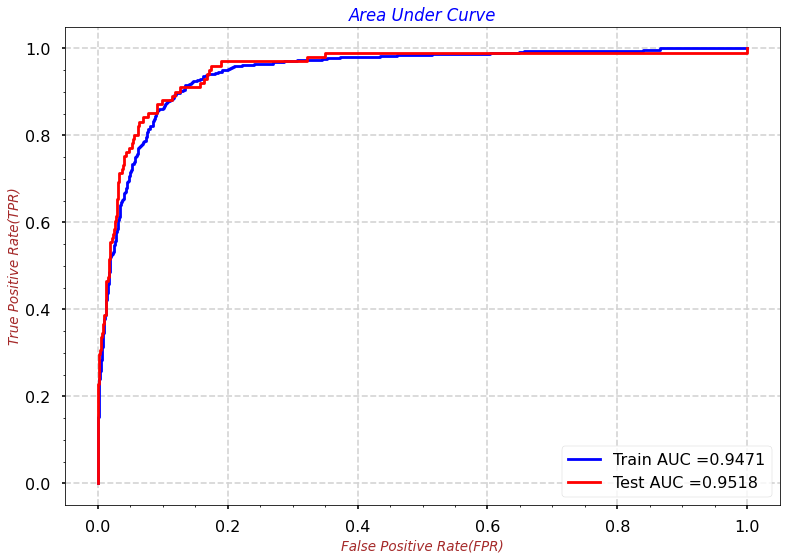

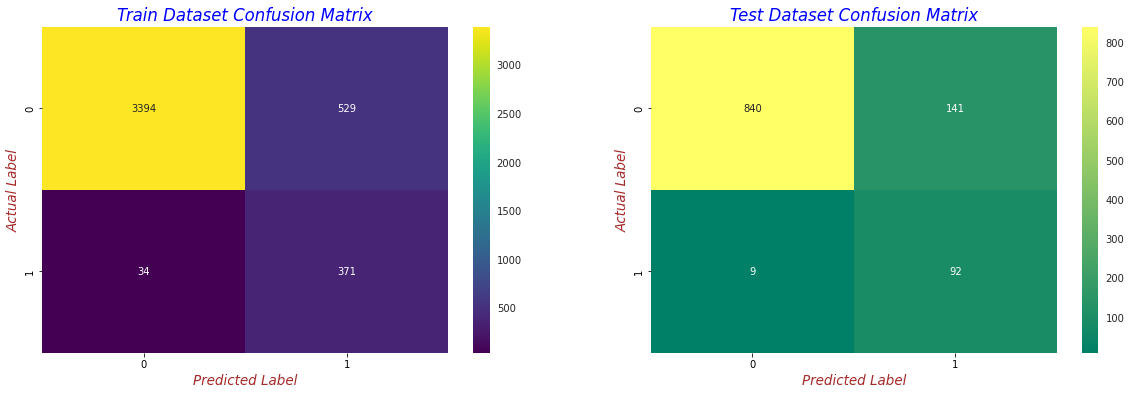



### Best Threshold = 0.3544
### Model AUC is : 0.9518
### Model Train F1 Score is : 0.5686
### Model Test F1 Score is : 0.5509


In [532]:
# Validate Logistic Regression model
test_auc, train_f1_score, test_f1_score, best_t = validate_model(log_reg_1, X_train_std, X_test_std, y_train, y_test)

print("\n")
print("### Best Threshold = {:.4f}".format(best_t))
print("### Model AUC is : {:.4f}".format(test_auc))
print("### Model Train F1 Score is : {:.4f}".format(train_f1_score))
print("### Model Test F1 Score is : {:.4f}".format(test_f1_score))

In [533]:
feats_imps = pd.DataFrame({'Features': X_train.columns, 'Importance_Model_1': log_reg_1.coef_[0]})
feats_imps = feats_imps[feats_imps['Importance_Model_1'] != 0]
feats_imps.reset_index(drop=True, inplace=True)
feats_imps.head()

,Features,Importance_Model_1
0,InscClaimAmtReimbursed,0.548121
1,Admitted_Duration,0.548848
2,PRV_Tot_DGrpCodes,-0.037874
3,PRV_Tot_Unq_DOB_Years,-0.270709
4,PRV_Bene_Age_Sum,0.054760


In [534]:
top_15_pos_feats = feats_imps.sort_values(by='Importance_Model_1',axis=0,ascending=False)['Features'].iloc[0:15]
top_15_pos_feats_scores = feats_imps.sort_values(by='Importance_Model_1',axis=0,ascending=False)['Importance_Model_1'].iloc[0:15]

In [535]:
top_15_neg_feats = feats_imps.sort_values(by='Importance_Model_1',axis=0,ascending=True)['Features'].iloc[0:15]
top_15_neg_feats_scores = feats_imps.sort_values(by='Importance_Model_1',axis=0,ascending=True)['Importance_Model_1'].iloc[0:15]

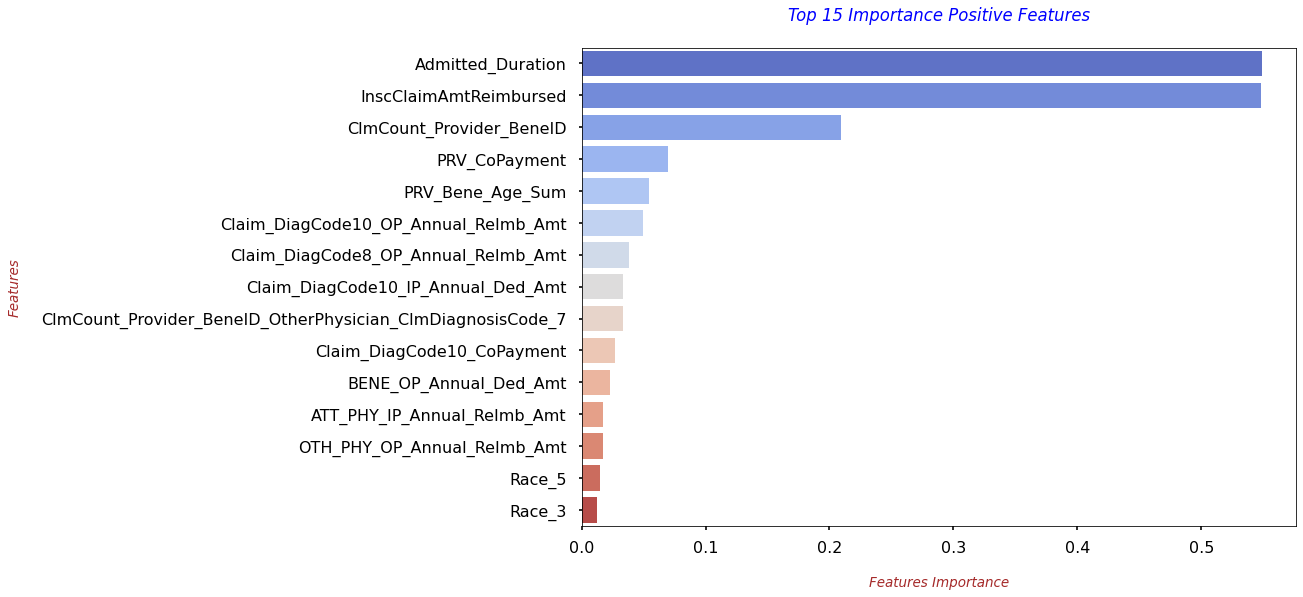

In [536]:
with plt.style.context('seaborn-poster'):
    sns.barplot(y=top_15_pos_feats, x=top_15_pos_feats_scores, orient='h', palette='coolwarm')
    plt.xlabel("\nFeatures Importance", fontdict=label_font_dict)
    plt.ylabel("Features\n", fontdict=label_font_dict)
    plt.title("Top 15 Importance Positive Features\n", fontdict=title_font_dict)

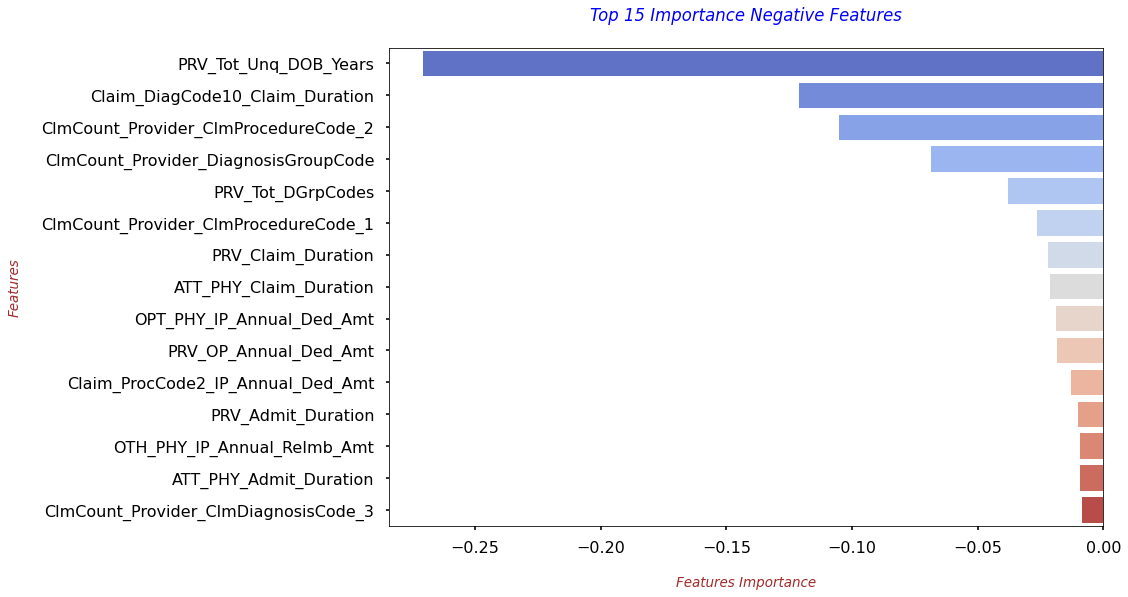

In [537]:
with plt.style.context('seaborn-poster'):
    sns.barplot(y=top_15_neg_feats, x=top_15_neg_feats_scores, orient='h', palette='coolwarm')
    plt.xlabel("\nFeatures Importance", fontdict=label_font_dict)
    plt.ylabel("Features\n", fontdict=label_font_dict)
    plt.title("Top 15 Importance Negative Features\n", fontdict=title_font_dict)

#### **`2. Decision Tree`**

In [538]:
from sklearn.tree import DecisionTreeClassifier

In [539]:
# Training the model with all features and hyper-parameterized values
dec_tree_2 = DecisionTreeClassifier(criterion='gini',
                                   max_depth= 6,
                                   max_features='log2',
                                   min_samples_leaf=150,
                                   min_samples_split=150,
                                   class_weight='balanced',
                                   random_state=49,
                                   splitter='best',
                                   min_weight_fraction_leaf=0.0,
                                   max_leaf_nodes=None,
                                   min_impurity_decrease=0.0,
                                   ccp_alpha=0.0,)

dec_tree_2.fit(X_train_std, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6,
                       max_features='log2', min_samples_leaf=150,
                       min_samples_split=150, random_state=49)

### Train AUC = 0.9264832595361951
### Test AUC = 0.9259948930672883


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:32: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.


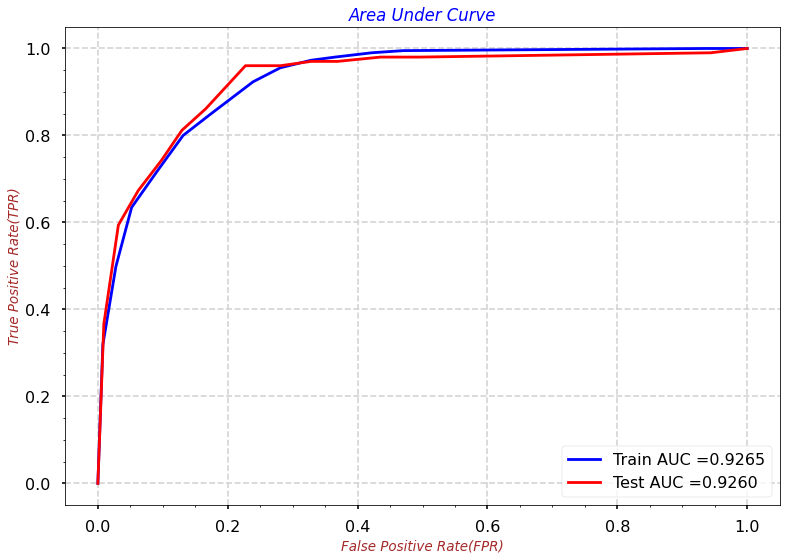

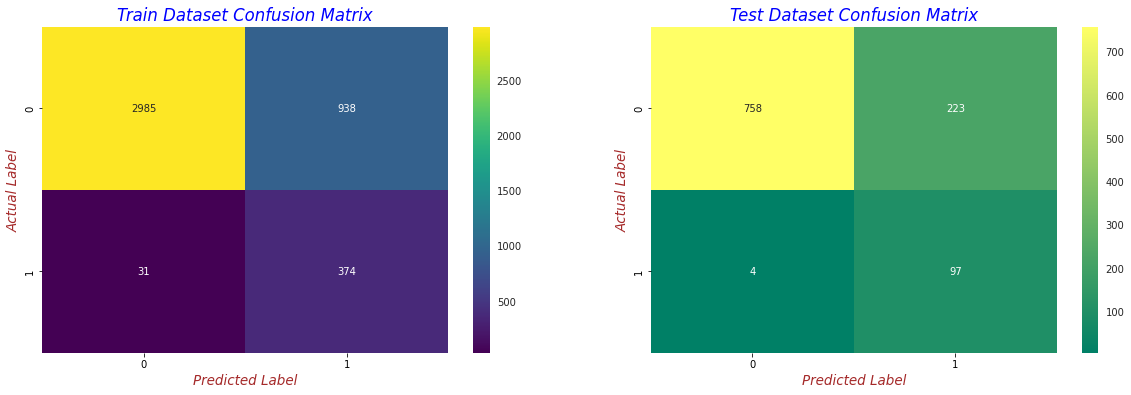



### Best Threshold = 0.5316
### Model AUC is : 0.9260
### Model Train F1 Score is : 0.4356
### Model Test F1 Score is : 0.4608


In [540]:
# Validate model
test_auc, train_f1_score, test_f1_score, best_t = validate_model(dec_tree_2, X_train_std, X_test_std, y_train, y_test)

print("\n")
print("### Best Threshold = {:.4f}".format(best_t))
print("### Model AUC is : {:.4f}".format(test_auc))
print("### Model Train F1 Score is : {:.4f}".format(train_f1_score))
print("### Model Test F1 Score is : {:.4f}".format(test_f1_score))

In [541]:
feats_imps = pd.DataFrame({'Features': X_train.columns, 'Importance_Model_1': dec_tree_2.feature_importances_})
feats_imps = feats_imps[feats_imps['Importance_Model_1'] != 0]
feats_imps.reset_index(drop=True, inplace=True)
feats_imps.head()

,Features,Importance_Model_1
0,DeductibleAmtPaid,0.040583
1,OPT_PHY_Admit_Duration,0.003299
2,OTH_PHY_Claim_Duration,0.000785
3,Claim_Admit_Diag_Code_IP_Annual_ReImb_Amt,0.700819
4,Claim_Admit_Diag_Code_IP_Annual_Ded_Amt,0.002466


In [542]:
top_15_pos_feats = feats_imps.sort_values(by='Importance_Model_1',axis=0,ascending=False)['Features'].iloc[0:15]
top_15_pos_feats_scores = feats_imps.sort_values(by='Importance_Model_1',axis=0,ascending=False)['Importance_Model_1'].iloc[0:15]

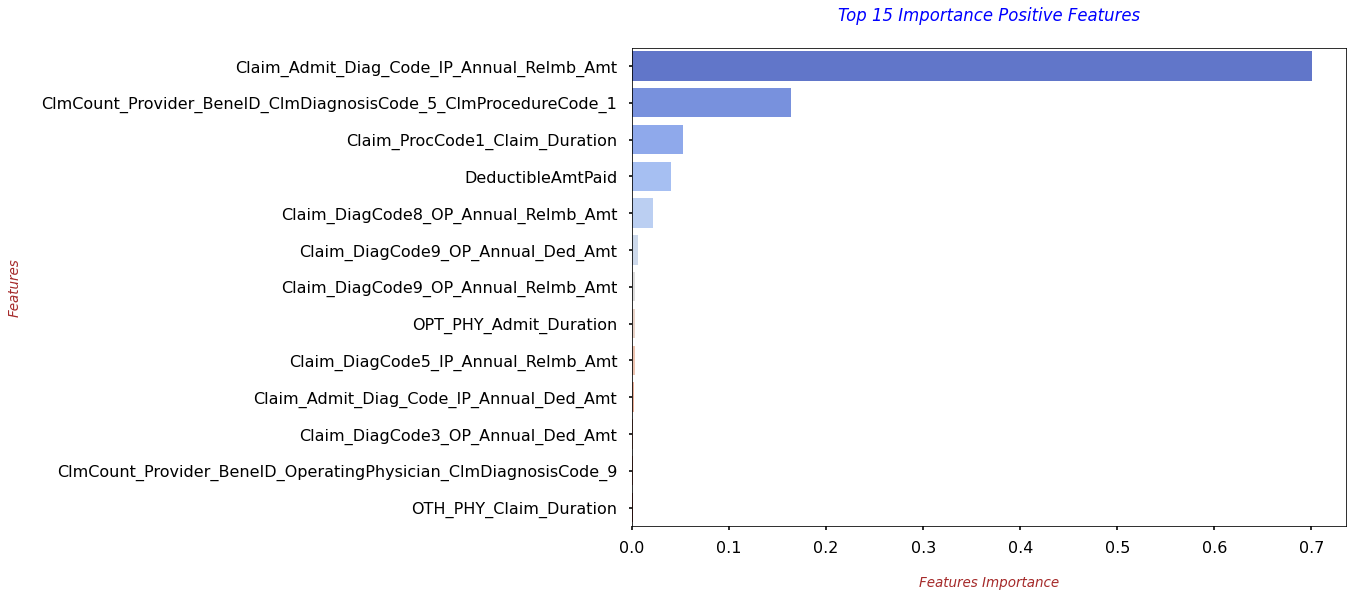

In [543]:
with plt.style.context('seaborn-poster'):
    sns.barplot(y=top_15_pos_feats, x=top_15_pos_feats_scores, orient='h', palette='coolwarm')
    plt.xlabel("\nFeatures Importance", fontdict=label_font_dict)
    plt.ylabel("Features\n", fontdict=label_font_dict)
    plt.title("Top 15 Importance Positive Features\n", fontdict=title_font_dict)

#### **`3. Random Forest Classifier`**

In [544]:
from sklearn.ensemble import RandomForestClassifier

In [545]:
# Training the model with all features and hyper-parameterized values
rfc_3 = RandomForestClassifier(n_estimators=30,criterion='gini',
                                   max_depth= 4,
                                   max_features='auto',
                                   min_samples_leaf=50,
                                   min_samples_split=50,
                                   class_weight='balanced',
                                   random_state=49,
                                   min_weight_fraction_leaf=0.0,
                                   max_leaf_nodes=None,
                                   min_impurity_decrease=0.0,
                                   ccp_alpha=0.0,)

rfc_3.fit(X_train_std, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=4,
                       min_samples_leaf=50, min_samples_split=50,
                       n_estimators=30, random_state=49)

### Train AUC = 0.9457812898292124
### Test AUC = 0.9517970145638417


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:32: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.


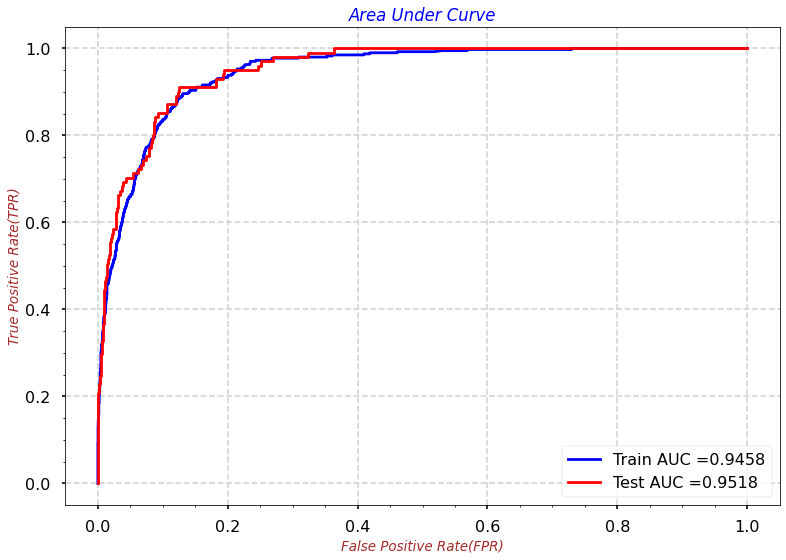

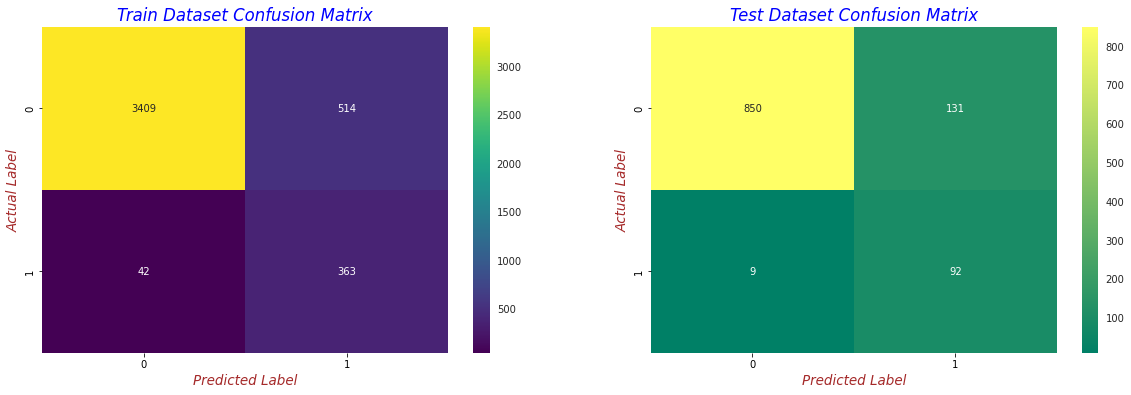



### Best Threshold = 0.5390
### Model AUC is : 0.9518
### Model Train F1 Score is : 0.5663
### Model Test F1 Score is : 0.5679


In [546]:
# Validate model
test_auc, train_f1_score, test_f1_score, best_t = validate_model(rfc_3, X_train_std, X_test_std, y_train, y_test)

print("\n")
print("### Best Threshold = {:.4f}".format(best_t))
print("### Model AUC is : {:.4f}".format(test_auc))
print("### Model Train F1 Score is : {:.4f}".format(train_f1_score))
print("### Model Test F1 Score is : {:.4f}".format(test_f1_score))

In [547]:
feats_imps = pd.DataFrame({'Features': X_train.columns, 'Importance_Model_1': rfc_3.feature_importances_})
feats_imps = feats_imps[feats_imps['Importance_Model_1'] != 0]
feats_imps.reset_index(drop=True, inplace=True)
feats_imps.head()

,Features,Importance_Model_1
0,InscClaimAmtReimbursed,0.012603
1,DeductibleAmtPaid,0.028761
2,RenalDiseaseIndicator,0.000322
3,ChronicCond_ObstrPulmonary,0.000937
4,ChronicCond_Diabetes,0.000268


In [548]:
top_20_pos_feats = feats_imps.sort_values(by='Importance_Model_1',axis=0,ascending=False)['Features'].iloc[0:20]
top_20_pos_feats_scores = feats_imps.sort_values(by='Importance_Model_1',axis=0,ascending=False)['Importance_Model_1'].iloc[0:20]

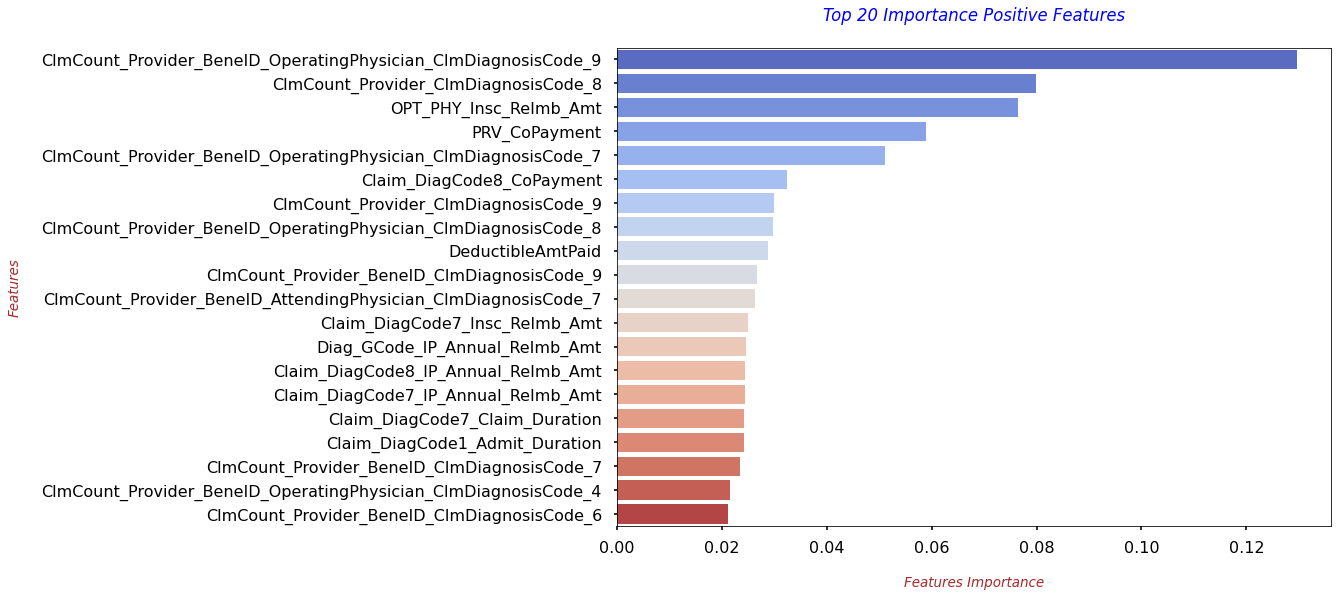

In [549]:
with plt.style.context('seaborn-poster'):
    sns.barplot(y=top_20_pos_feats, x=top_20_pos_feats_scores, orient='h', palette='coolwarm')
    plt.xlabel("\nFeatures Importance", fontdict=label_font_dict)
    plt.ylabel("Features\n", fontdict=label_font_dict)
    plt.title("Top 20 Importance Positive Features\n", fontdict=title_font_dict)